<a href="https://colab.research.google.com/github/sonewn/Wanted_AI_Onboarding/blob/main/2%EC%A3%BC%EC%B0%A8_%EA%B8%B0%EC%97%85%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 한글 글꼴 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

# 0. 데이터 구조

<h2> ✅ 분석 데이터 셋

* 유튜브 메인 페이지 "탐색/인기" 섹션에서 기초한 데이터셋
특정 기간동안의 동영상 트렌드 기록/연구 및 데이터를 다양한 관점으로 인사이트 도출
  * 주어진 데이터셋은 유튜브에서 인기 동영상으로 선택된 비디오 기준으로 가공
  * 하루에 한 번씩 수집
  * 각각의 비디오가 인기 동영상에 처음 포착된 시점, 사라진 시점 기록되어 있음

In [ ]:
# 데이터셋 불러오기
pretest = pd.read_csv('/content/drive/MyDrive/원티드_AI온보딩/기업과제/pretest_data.csv')

In [ ]:
pretest.columns

Index(['video_id', 'channel_id', 'published_date', 'category_name', 'duration',
       'tags', 'description', 'on_trending_date', 'off_trending_date',
       'on_rank', 'off_rank', 'on_views', 'off_views', 'on_likes', 'off_likes',
       'on_dislikes', 'off_dislikes', 'on_comments', 'off_comments',
       'on_channel_subscribers', 'off_channel_subscribers',
       'on_channel_total_views', 'off_channel_total_views',
       'on_channel_total_videos', 'off_channel_total_videos'],
      dtype='object')

In [ ]:
# pretest data 기본정보 보기

print(f'1. data shape : {pretest.shape} \n')
print(f'2. data columns : \n {pretest.columns} \n')
print(f'3. data null : \n {pretest.isnull().sum()[pretest.isnull().sum() > 0] } \n')
print(f'4. check duplicated video : \n {pretest.video_id[pretest.duplicated(["video_id"])]} \n')
#print(f'3. data value counts : \n {pretest["channel_id"].value_counts()} \n')

#print(f'3. data value counts : \n {pretest["video_id"].value_counts()} \n')

1. data shape : (2644, 25) 

2. data columns : 
 Index(['video_id', 'channel_id', 'published_date', 'category_name', 'duration',
       'tags', 'description', 'on_trending_date', 'off_trending_date',
       'on_rank', 'off_rank', 'on_views', 'off_views', 'on_likes', 'off_likes',
       'on_dislikes', 'off_dislikes', 'on_comments', 'off_comments',
       'on_channel_subscribers', 'off_channel_subscribers',
       'on_channel_total_views', 'off_channel_total_views',
       'on_channel_total_videos', 'off_channel_total_videos'],
      dtype='object') 

3. data null : 
 tags           370
description     40
dtype: int64 

4. check duplicated video : 
 535    VBSBm
Name: video_id, dtype: object 



<h2> 🔍 중복 id는 같은 비디오일까?

In [ ]:
pretest[pretest.video_id == 'VBSBm']  #  --> 확인 결과 아예 다른 채널의 다른 주제 비디오

,video_id,channel_id,published_date,category_name,duration,tags,description,on_trending_date,off_trending_date,on_rank,...,on_dislikes,off_dislikes,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos
534,VBSBm,CH0VR2v,2021-05-07,Entertainment,PT11M6S,요리|레시피|육식|고기|육식맨|고기요리|YOOXICMAN|짜장면|자장면|짜장|고기짜...,"※ 오늘 영상에 등장하는 모든 식재료, 조리도구, 업장, TV프로그램, 브랜드, 서...",2021-05-09,2021-05-10,40,...,156,187,1458,1568,652000,652000,94094934,94383615,90,90
535,VBSBm,CHF4Wxd,2021-07-09,News & Politics,PT1M56S,MBC|MBC뉴스|뉴스데스크|newsdesk|뉴스투데이|newstoday|8시뉴스|...,전남 순천의 한 어린이집에서 원생을 마중 나온 선생님이 경사로에 밀린 학부모의 차량...,2021-07-11,2021-07-14,3,...,625,765,16067,17655,1430000,1440000,3130819202,3151554338,112154,112456


In [ ]:
pretest[pretest.video_id == 'VBSBm2']  #  --> 대체하려는 id 'VBSBm2가 있는 지 확인, 결과 없음

,video_id,channel_id,published_date,category_name,duration,tags,description,on_trending_date,off_trending_date,on_rank,...,on_dislikes,off_dislikes,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos


In [ ]:
# id 변경
pretest['video_id'].iloc[535] = 'VBSm2'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
# 중복 id 변경 잘 되었는지 다시 확인
print(f'Recheck duplicated video : \n {pretest.video_id[pretest.duplicated(["video_id"])]} \n')

Recheck duplicated video : 
 Series([], Name: video_id, dtype: object) 



# 1. 데이터 시각화


## 0️⃣ 전체 데이터의 카테고리 분포



In [ ]:
pretest['category_name'].value_counts()

Entertainment            954
People & Blogs           411
Music                    234
Sports                   222
Comedy                   167
News & Politics          162
Howto & Style            119
Gaming                    80
Film & Animation          74
Education                 65
Pets & Animals            65
Science & Technology      36
Autos & Vehicles          31
Travel & Events           23
Nonprofits & Activism      1
Name: category_name, dtype: int64

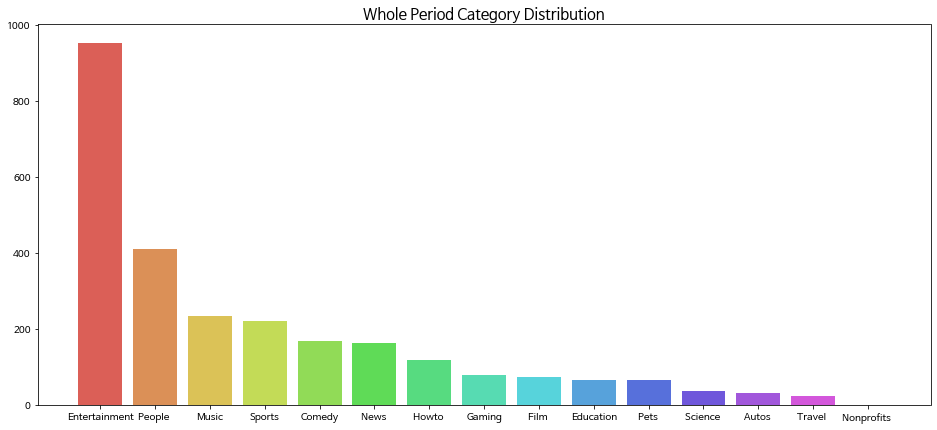

In [ ]:
# 전체 인기동영상 카테고리 분포 시각화
fig = plt.figure(figsize=(16,7))  # 캔버스 생성

values = pretest['category_name'].value_counts().to_list()
xlabels = pretest['category_name'].value_counts().index.to_list()
xlabels  = [i[:int(i.find('&'))] if ('&' in i) else i for i in xlabels]

colors = sns.color_palette('hls',16) 

plt.bar(np.arange(15), values, color=colors)
plt.xticks(np.arange(15), xlabels)
plt.title('Whole Period Category Distribution',fontsize=15) ## 타이틀 설정


plt.show()

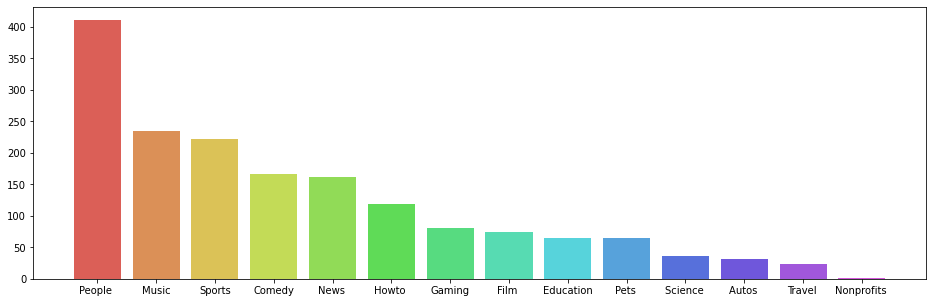

In [ ]:
# Entertainment 제외 인기동영상 카테고리 분포 시각화
fig = plt.figure(figsize=(16,5))  # 캔버스 생성

plt.bar(np.arange(14), values[1:], color=colors)
plt.xticks(np.arange(14), xlabels[1:])


plt.show()

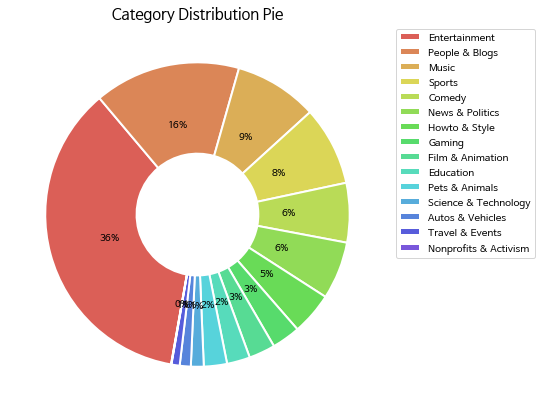

In [ ]:
# 기간 내 전체 인기영상 카테고리 분포 파이차트

fig = plt.figure(figsize=(20,7))  # 캔버스 생성

ratio = pretest['category_name'].value_counts().to_list()
labels = pretest['category_name'].value_counts().index.to_list()
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
colors = sns.color_palette('hls',20) 
wedgeprops={'width': 0.6, 'edgecolor': 'w', 'linewidth': 2}

ax = fig.add_subplot()
pie = ax.pie(ratio,startangle=260, counterclock=False, autopct = '%.f%%',colors=colors, wedgeprops=wedgeprops)

plt.title('Category Distribution Pie',fontsize=15) ## 타이틀 설정
plt.legend(pie[0],labels,loc='upper right', bbox_to_anchor=(1.4, 1))  # loc = legend 위치 조정, bbox_to_anchor=box 바깥 위치
plt.show()



## 1️⃣ 채널 ID 분포 (+ 채널 빈도수 feature 생성)



In [ ]:
# channel_id value_counts 값 저장
channel = pretest['channel_id'].value_counts()

In [ ]:
# 내림차순으로 정렬
channel.sort_values(ascending=False, inplace=True)

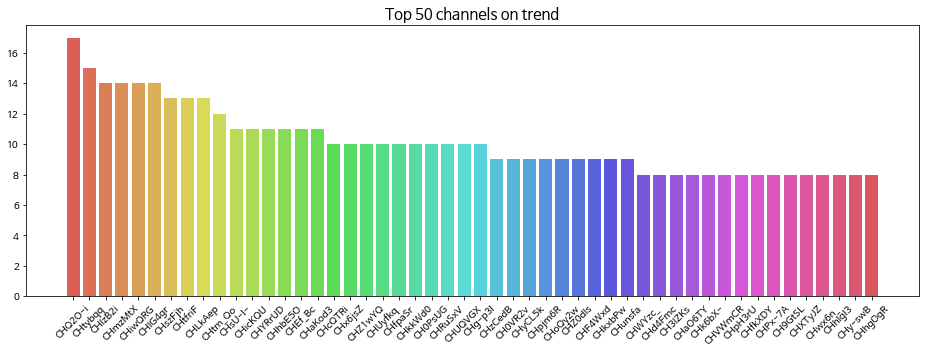

In [ ]:
# 시각화
fig = plt.figure(figsize=(16,5))  # 캔버스 생성

values = channel[:50].to_list()
labels = channel[:50].index.to_list()

colors = sns.color_palette('hls',50) 

plt.bar(np.arange(50), values, color=colors)
plt.xticks(np.arange(50), labels, fontsize=10, rotation = 45)

plt.title('Top 50 channels on trend',fontsize=15) ## 타이틀 설정


plt.show()

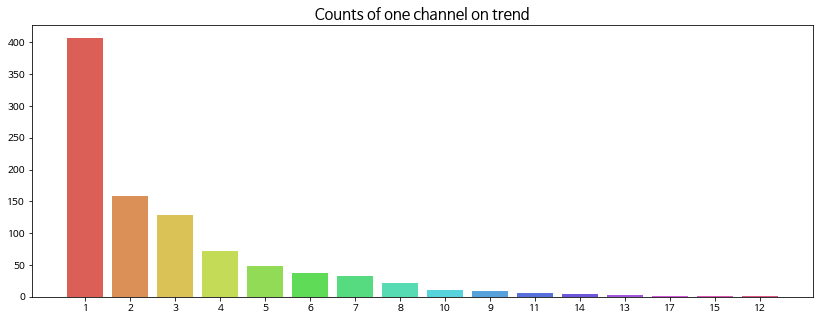

In [ ]:
# 채널 당 인기 동영상에 랭크된 빈도수
fig = plt.figure(figsize=(14,5))  # 캔버스 생성

values = pd.DataFrame(channel)['channel_id'].value_counts().to_list()
xlabels = pd.DataFrame(channel)['channel_id'].value_counts().index.to_list()

colors = sns.color_palette('hls',16) 

plt.bar(np.arange(16), values, color=colors)
plt.xticks(np.arange(16), xlabels)
plt.title('Counts of one channel on trend',fontsize=15) ## 타이틀 설정


plt.show()

In [ ]:
# 채널 빈도수 새로운 feature 로 생성

channel_df = pd.DataFrame(columns=['channel_id','channel_freq'])
channel_df['channel_id'] = channel.index
channel_df['channel_freq'] = channel.values

In [ ]:
pretest = pretest.merge(channel_df, how='left')  # channel_id 로 채널 빈도수 정보를 merge
pretest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2644 entries, 0 to 2643
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   video_id                  2644 non-null   object
 1   channel_id                2644 non-null   object
 2   published_date            2644 non-null   object
 3   category_name             2644 non-null   object
 4   duration                  2644 non-null   object
 5   tags                      2274 non-null   object
 6   description               2604 non-null   object
 7   on_trending_date          2644 non-null   object
 8   off_trending_date         2644 non-null   object
 9   on_rank                   2644 non-null   int64 
 10  off_rank                  2644 non-null   int64 
 11  on_views                  2644 non-null   int64 
 12  off_views                 2644 non-null   int64 
 13  on_likes                  2644 non-null   int64 
 14  off_likes               

## 2️⃣ 카테고리 > 채널 > 비디오 수

In [ ]:
# 카테고리 별 채널 비디오 개수

multi = pretest.groupby(['category_name','channel_id']).count()
category_video = multi['video_id'].unstack()

In [ ]:
# 카테고리별 비디오 수 시각화 하는 함수
def visual_cat_cha_vi(df,indexno, font_size, figsize=(20,10)):
  titlename = df.index[indexno]
  data = df.iloc[indexno][df.iloc[indexno] > 0].sort_values(ascending=False)  # video id count가 1이상인 경우만 indexing

  # 시각화
  fig = plt.figure(figsize=figsize)  

  values = data.to_list()
  xlabels = data.index.to_list()

  colors = sns.color_palette('hls',len(values)) 

  plt.bar(np.arange(len(values)), values, color=colors)
  plt.xticks(np.arange(len(values)), xlabels, fontsize=font_size, rotation = 45)

  plt.title(f'{titlename}, Channels&Videoes numbers',fontsize=25) ## 타이틀 설정

  plt.show()


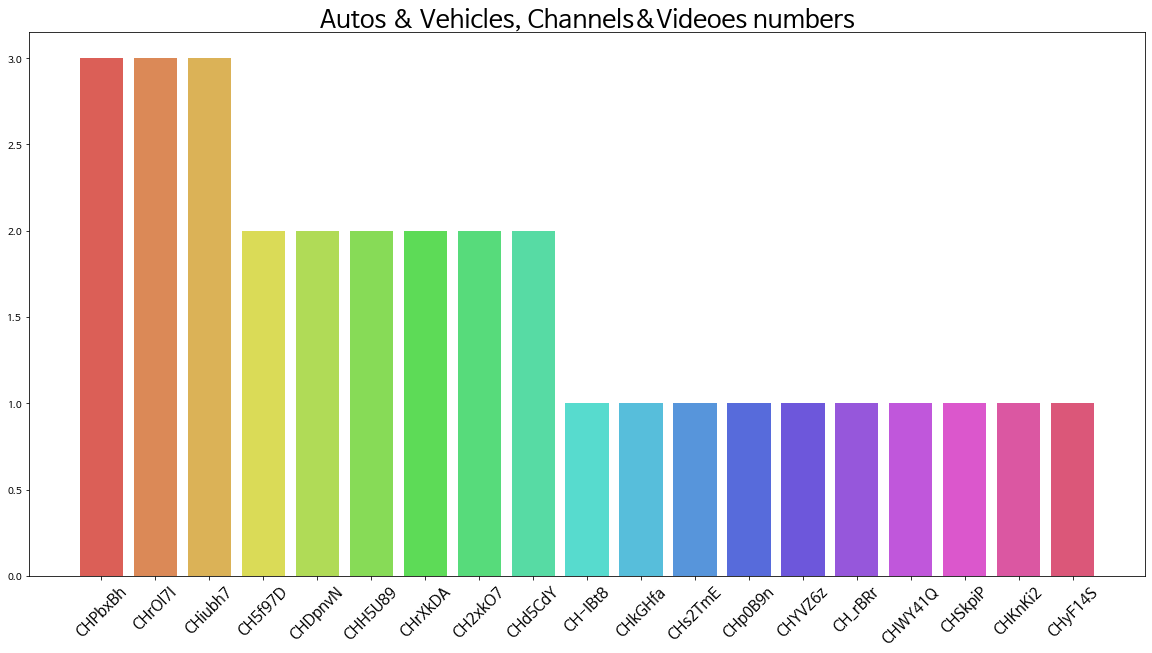

In [ ]:
visual_cat_cha_vi(category_video, 0, 15)

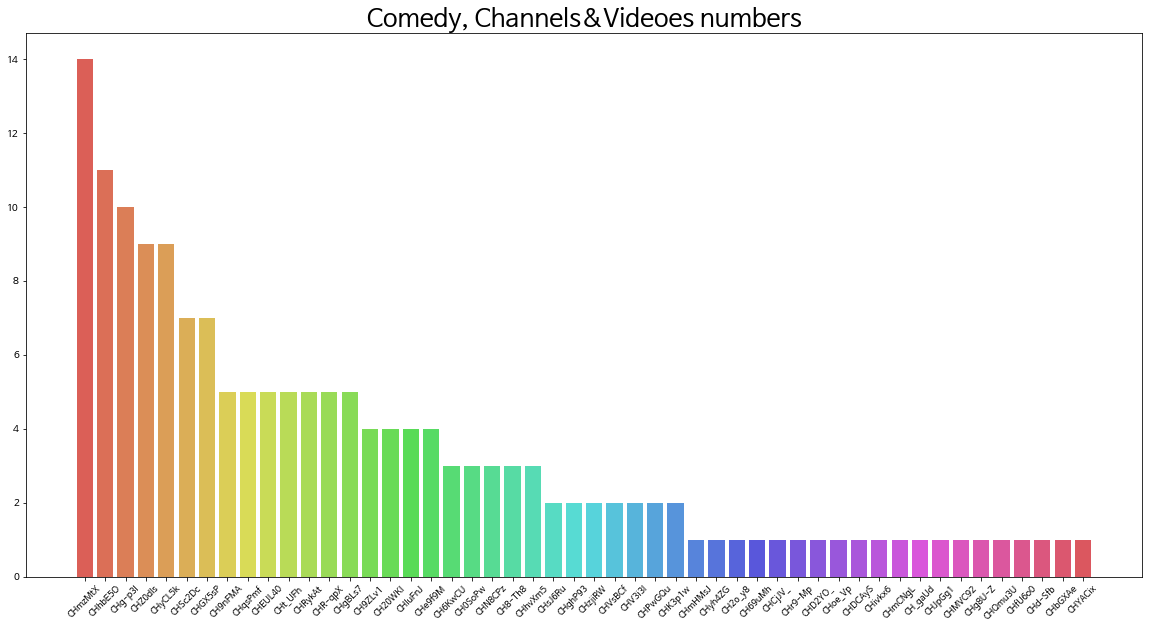

In [ ]:
visual_cat_cha_vi(category_video, 1, 9)

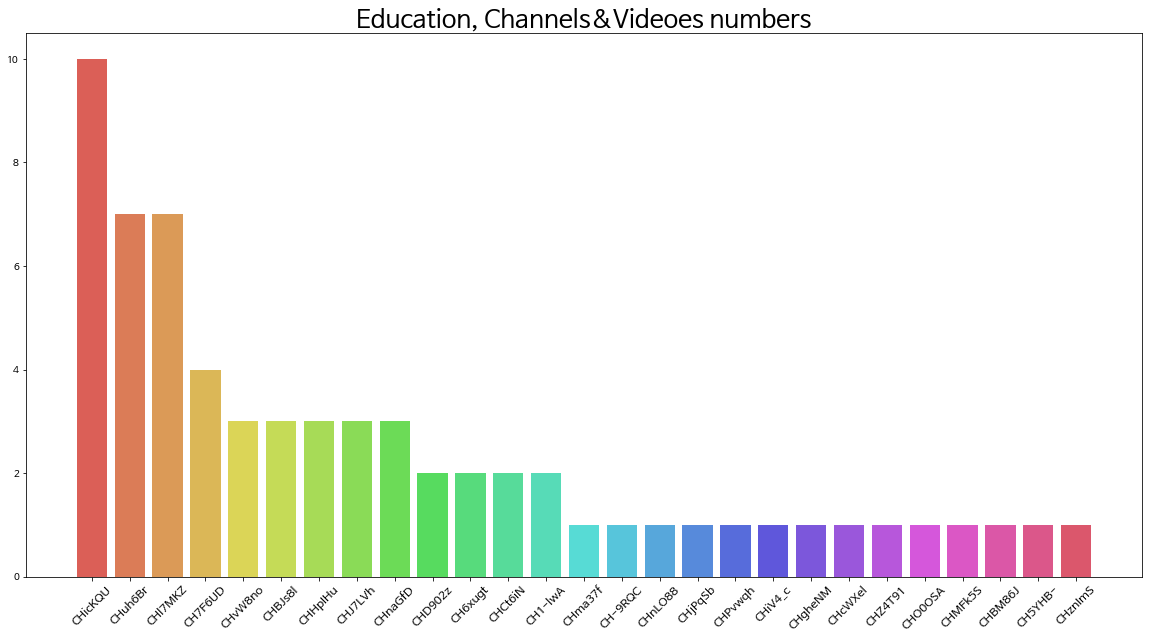

In [ ]:
visual_cat_cha_vi(category_video, 2, 12)

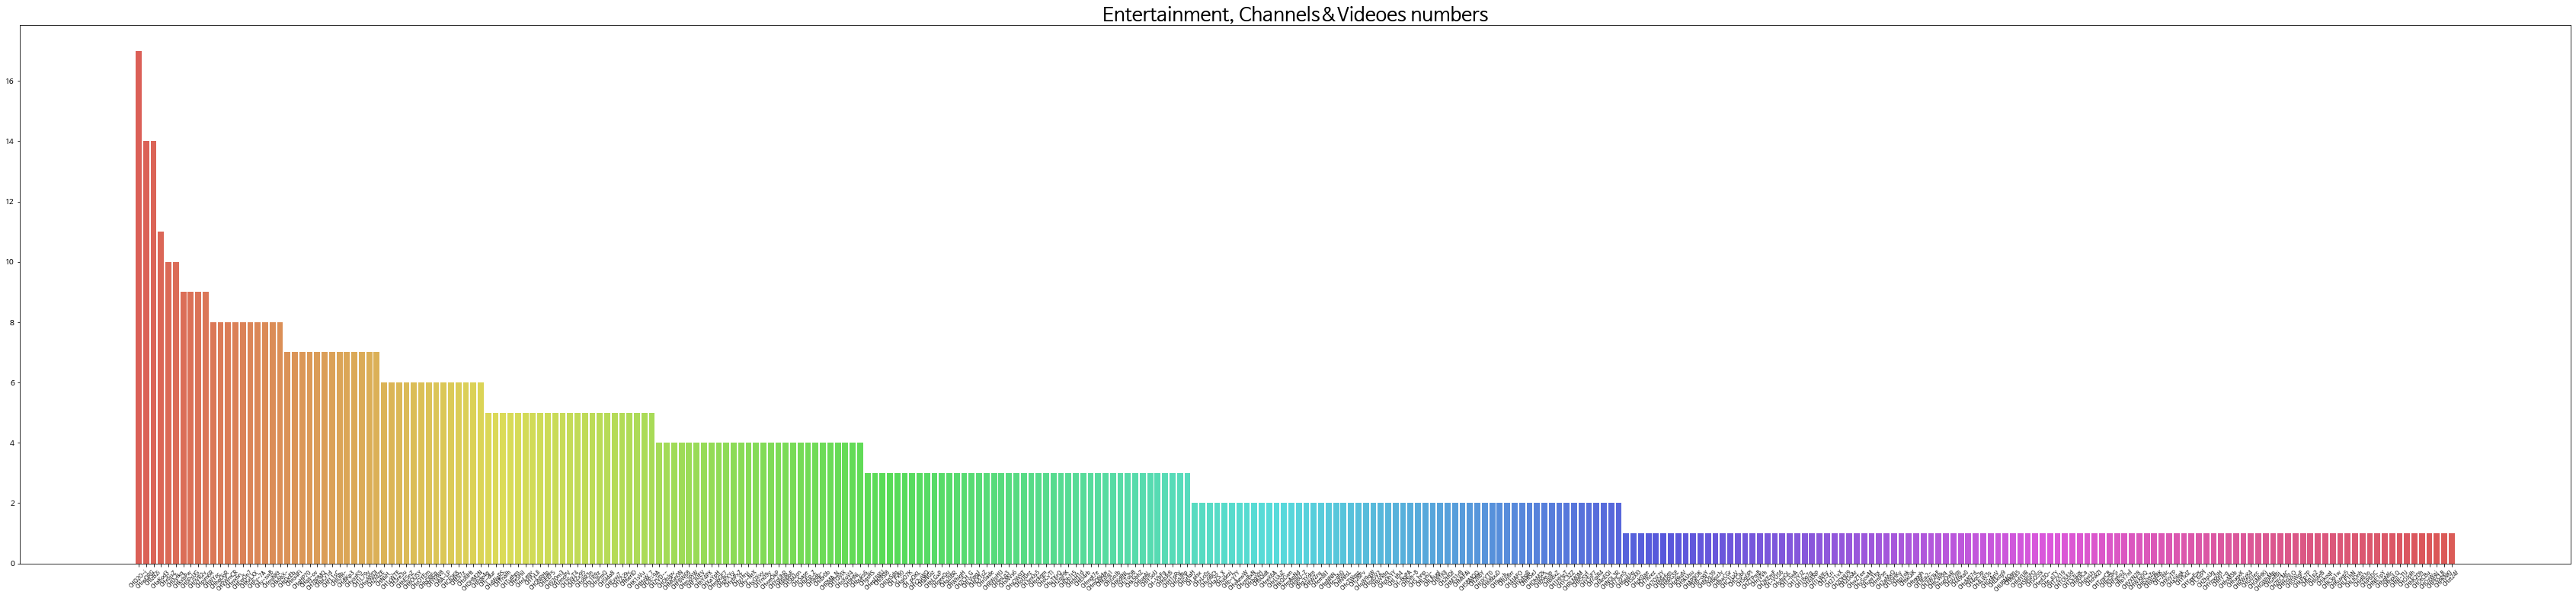

In [ ]:
visual_cat_cha_vi(category_video, 3, 7, (60, 13))  #  ---> 해당 카테고리 채널 수가 많아, 아래 셀에서 video 4개 이상만 시각화

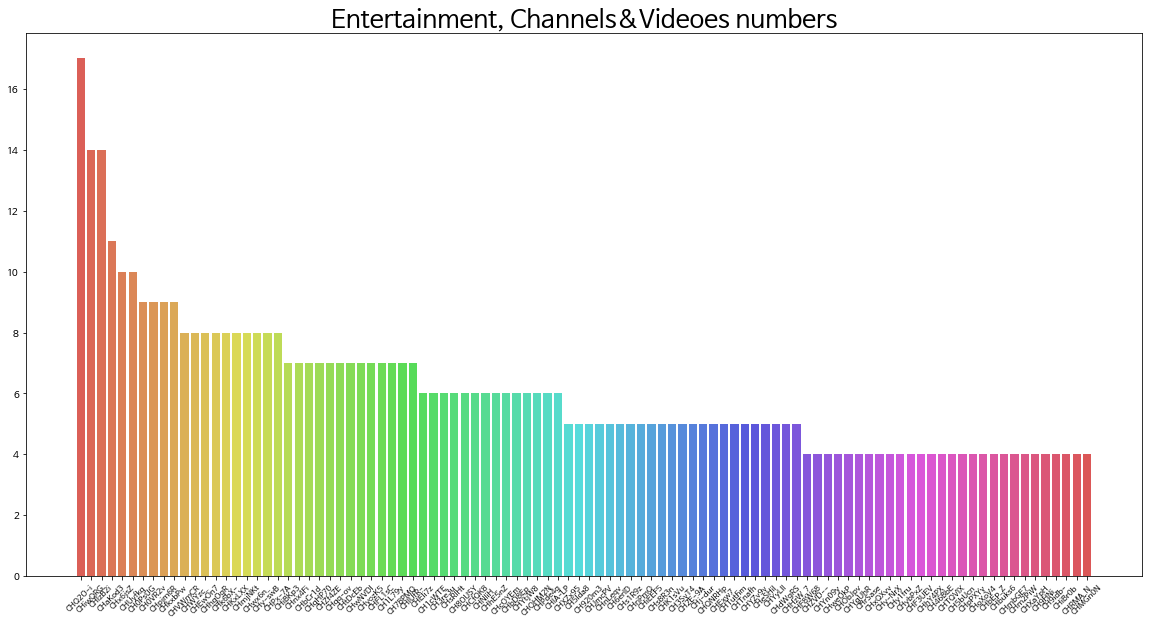

In [ ]:
def visual_cat_cha_vi2(df,indexno, font_size, figsize=(20,10)):
  titlename = df.index[indexno]
  data = df.iloc[indexno][df.iloc[indexno] > 3].sort_values(ascending=False)  # video id count가 1이상인 경우만 indexing

  # 시각화
  fig = plt.figure(figsize=figsize)  

  values = data.to_list()
  xlabels = data.index.to_list()

  colors = sns.color_palette('hls',len(values)) 

  plt.bar(np.arange(len(values)), values, color=colors)
  plt.xticks(np.arange(len(values)), xlabels, fontsize=font_size, rotation = 45)

  plt.title(f'{titlename}, Channels&Videoes numbers',fontsize=25) ## 타이틀 설정

  plt.show()

visual_cat_cha_vi2(category_video, 3, 8)

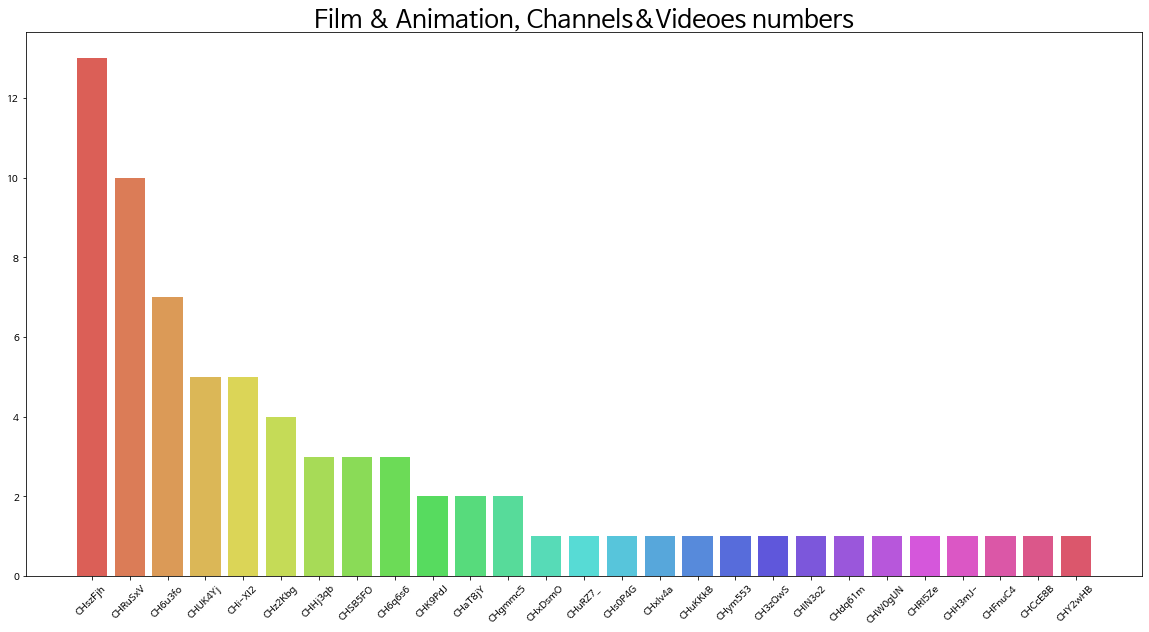

In [ ]:
visual_cat_cha_vi(category_video, 4, 10)

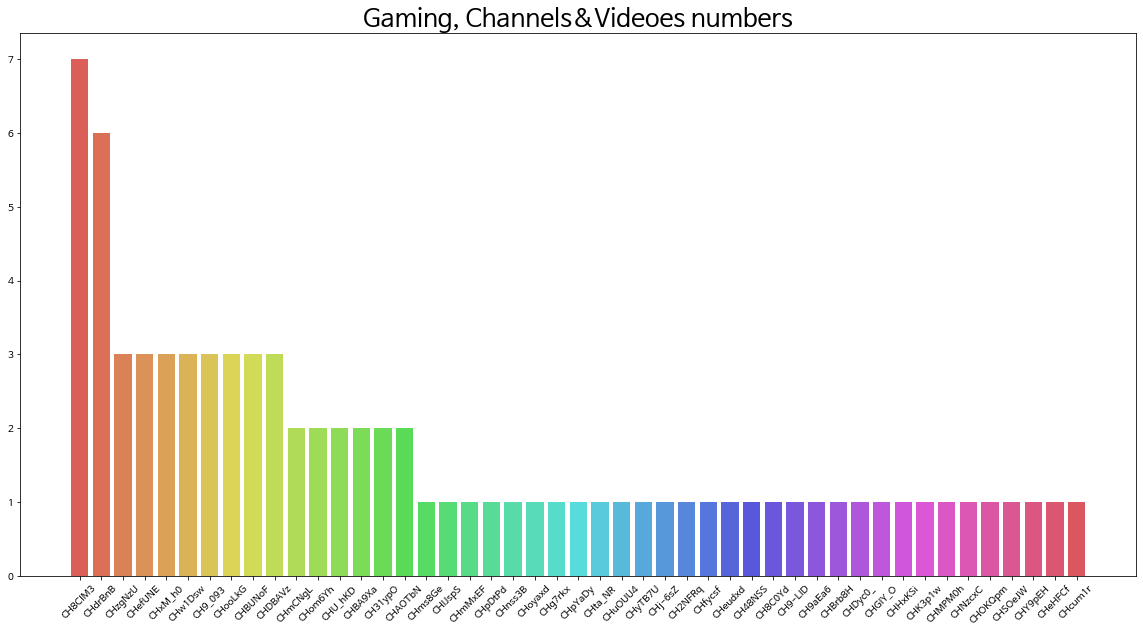

In [ ]:
visual_cat_cha_vi(category_video, 5, 10)

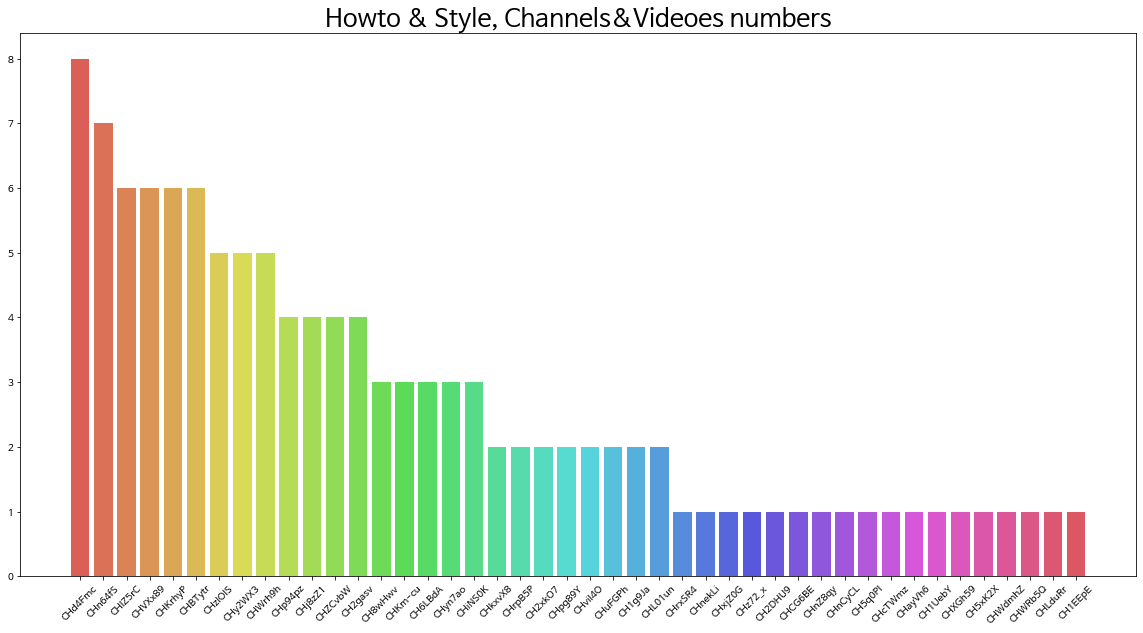

In [ ]:
visual_cat_cha_vi(category_video, 6, 10)

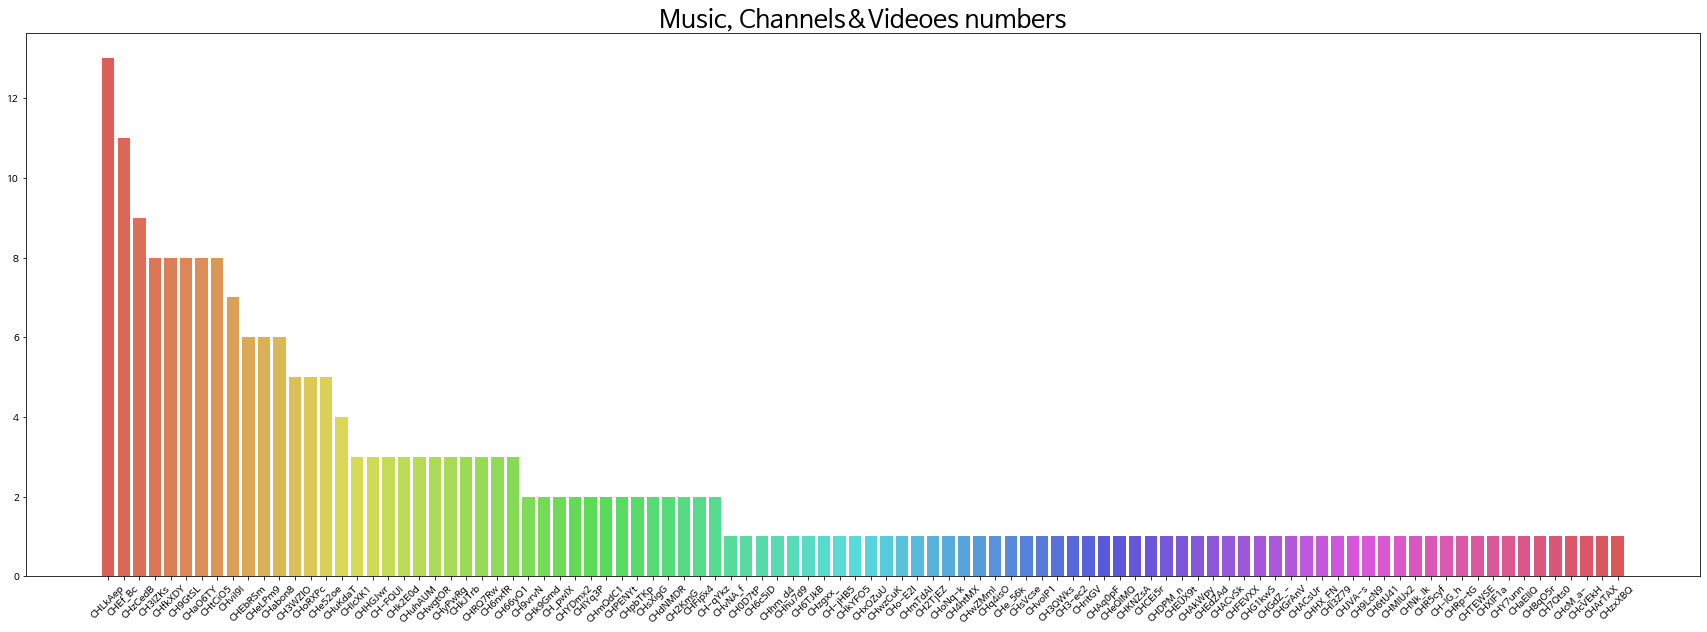

In [ ]:
visual_cat_cha_vi(category_video, 7, 10, (30,10))

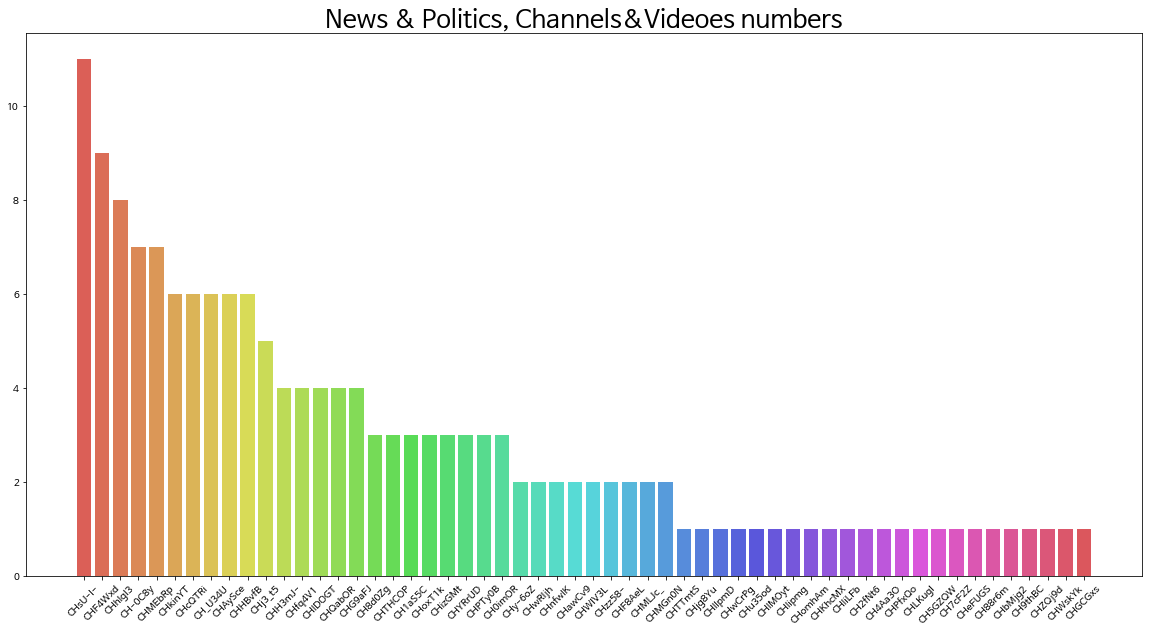

In [ ]:
visual_cat_cha_vi(category_video, 8, 10)

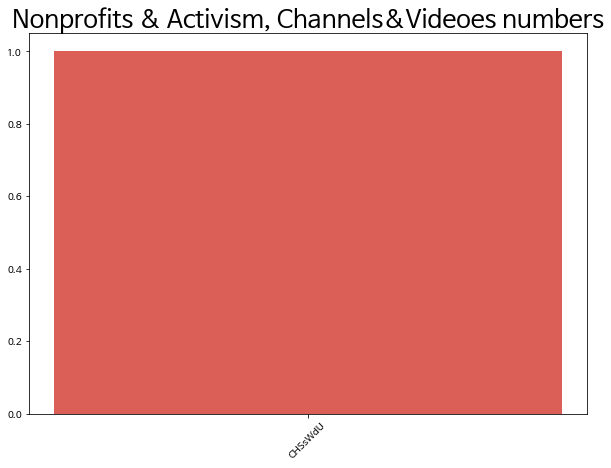

In [ ]:
visual_cat_cha_vi(category_video, 9, 10, (10,7))  # 채널이 1개

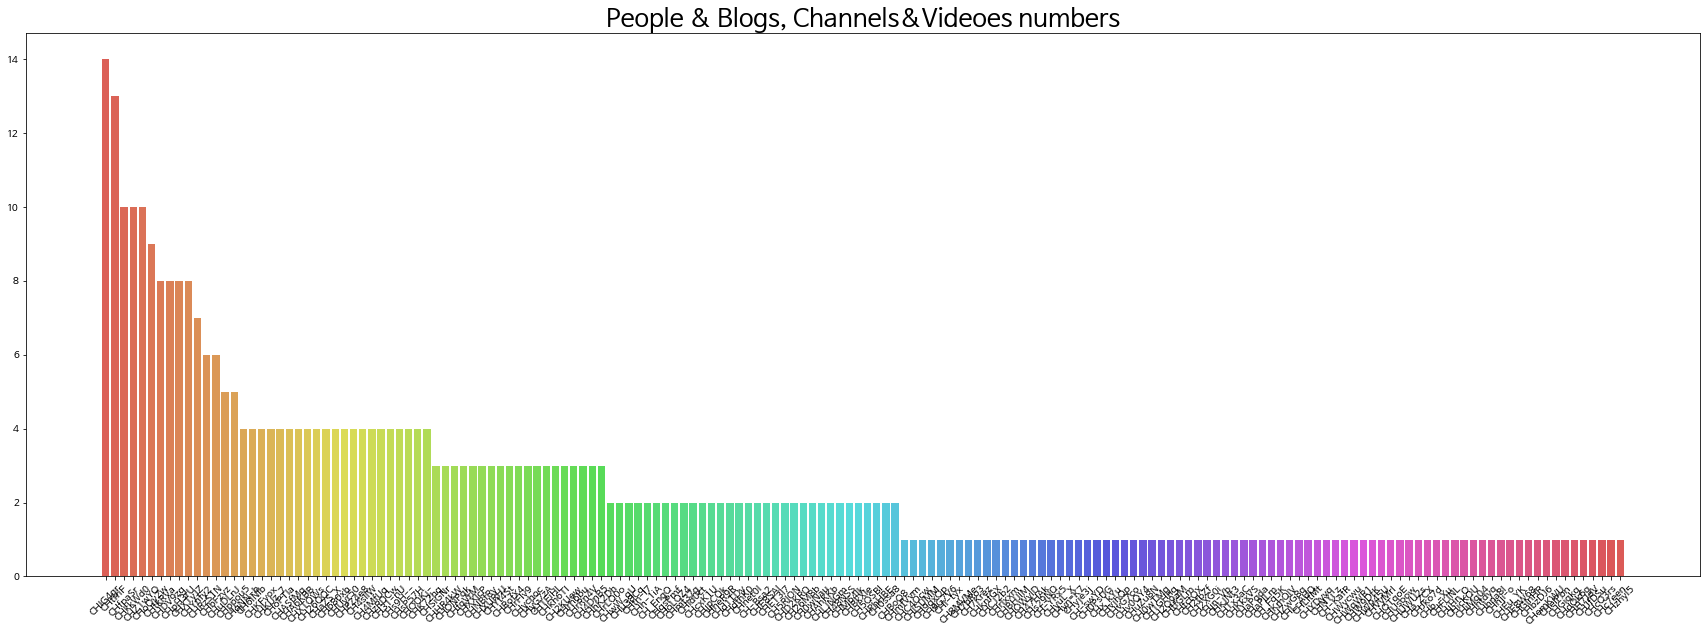

In [ ]:
visual_cat_cha_vi(category_video, 10, 10, (30,10)) # ---> 해당 카테고리 채널이 많아, 아래 셀에서 video가 2개 이상인 채널만 시각화

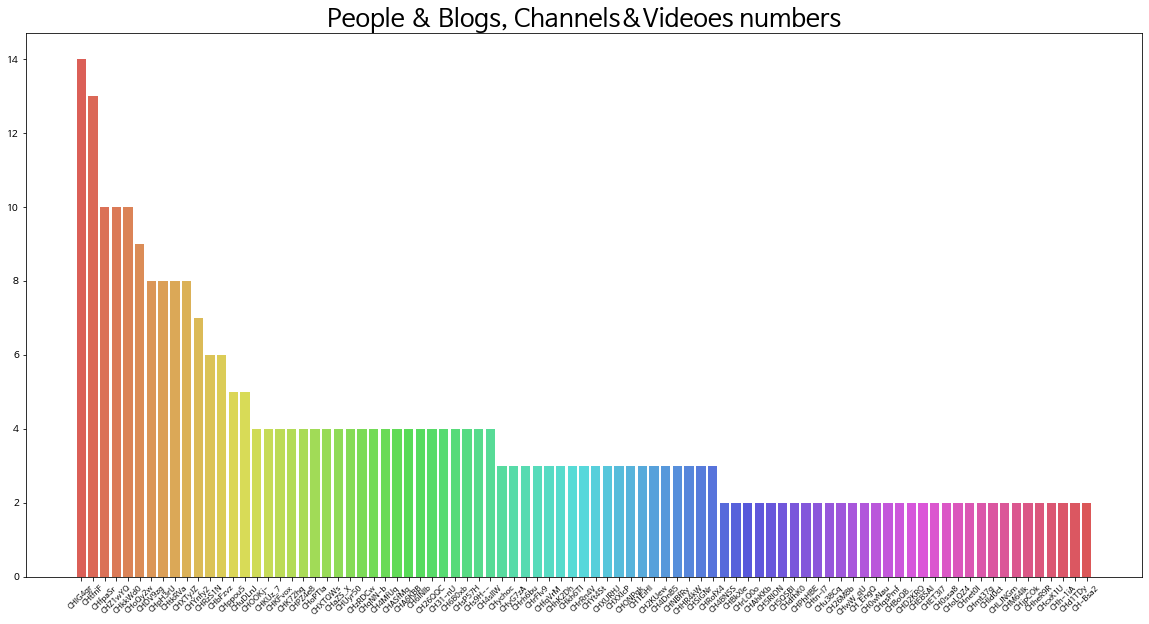

In [ ]:
def visual_cat_cha_vi2(df,indexno, font_size, figsize=(20,10)):
  titlename = df.index[indexno]
  data = df.iloc[indexno][df.iloc[indexno] > 1].sort_values(ascending=False)  # video id count가 2이상인 경우만 indexing

  # 시각화
  fig = plt.figure(figsize=figsize)  

  values = data.to_list()
  xlabels = data.index.to_list()

  colors = sns.color_palette('hls',len(values)) 

  plt.bar(np.arange(len(values)), values, color=colors)
  plt.xticks(np.arange(len(values)), xlabels, fontsize=font_size, rotation = 45)

  plt.title(f'{titlename}, Channels&Videoes numbers',fontsize=25) ## 타이틀 설정

  plt.show()

visual_cat_cha_vi2(category_video, 10, 8)

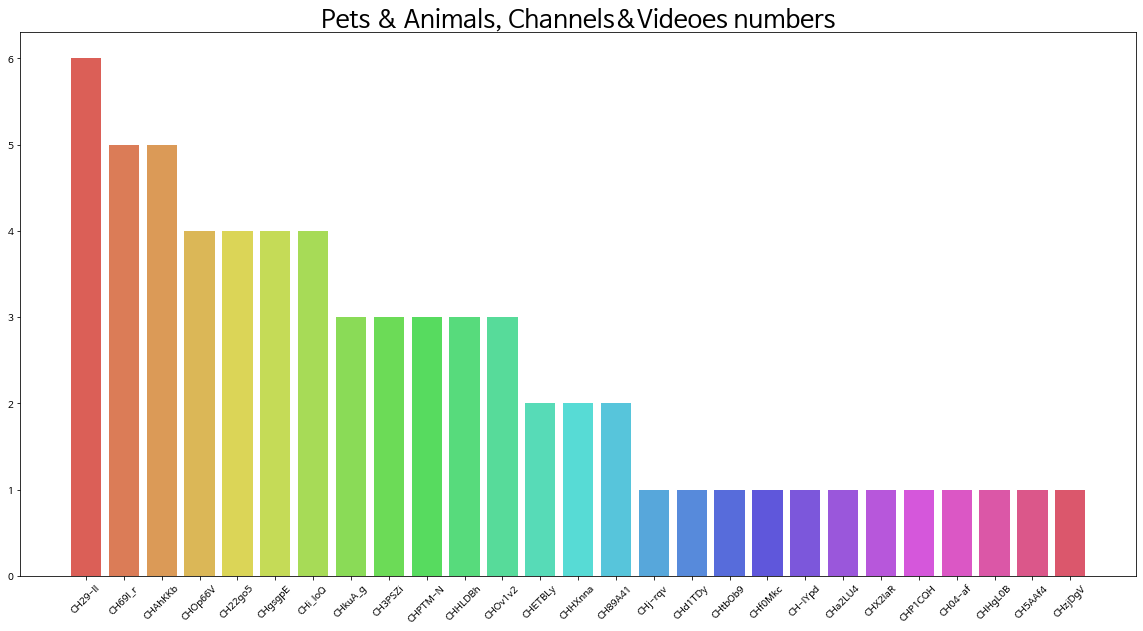

In [ ]:
visual_cat_cha_vi(category_video, 11, 10)

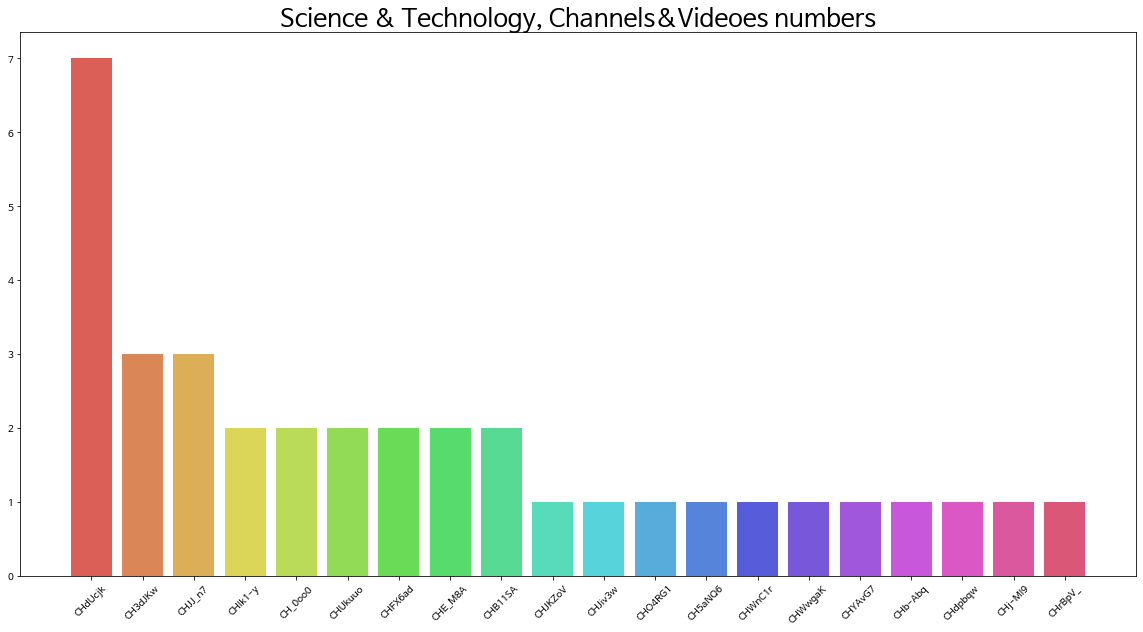

In [ ]:
visual_cat_cha_vi(category_video, 12, 10)

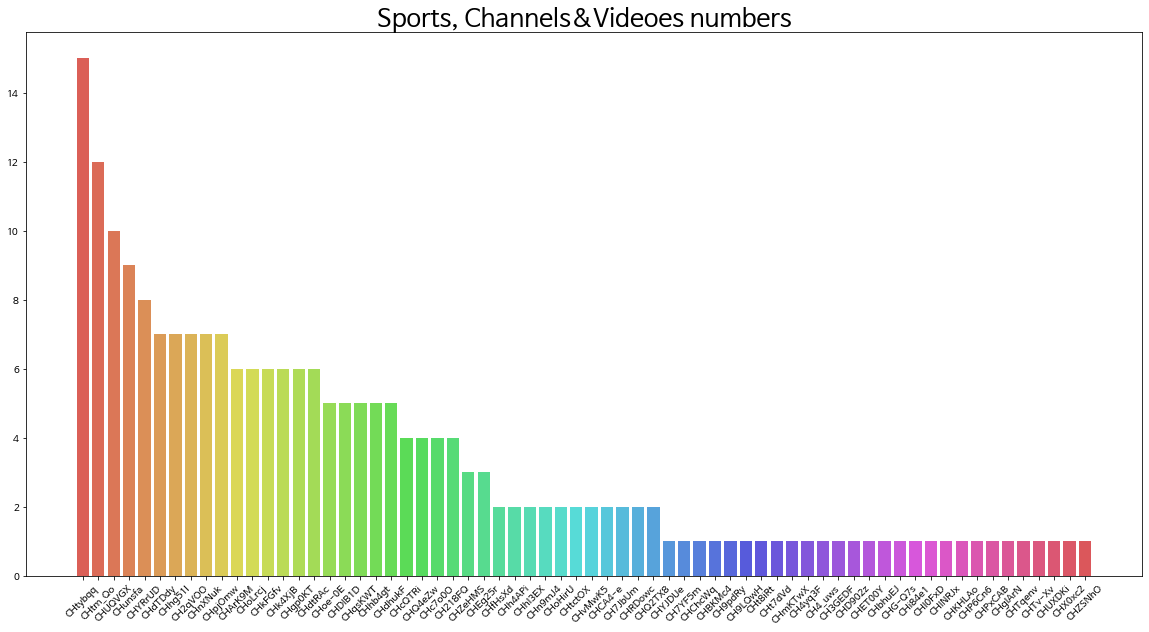

In [ ]:
visual_cat_cha_vi(category_video, 13, 10)

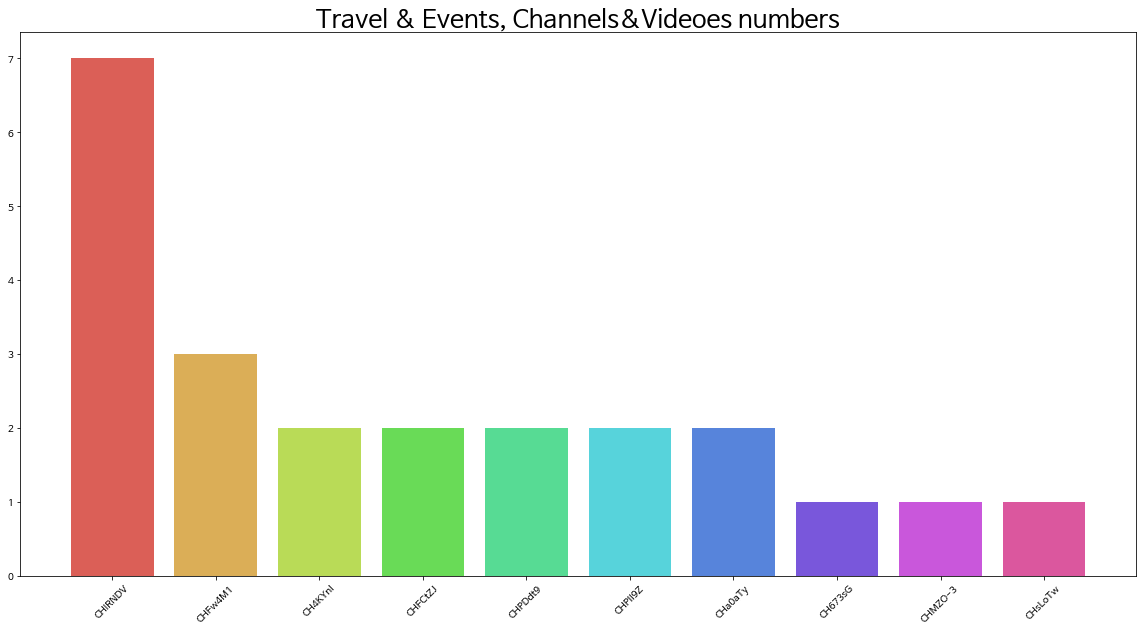

In [ ]:
visual_cat_cha_vi(category_video, 14, 10)

## 3️⃣ 월별 데이터 시각화

In [ ]:
# 업로드 날짜 datetime 변환
format = '%Y-%m-%d'
pretest['published_date'] = pretest['published_date'].apply(lambda x: datetime.datetime.strptime(x,format))
pretest.sort_values(by='published_date', inplace=True)

In [ ]:
# 가공 데이터 raw_dict 에 저장

raw_dict = {'pub_date':{}}
daterangelst = []

# -- 1. 게시일 월별 인덱싱
for month in range(3, 8):
  if len(str(month)) ==1:
    month = '0'+str(month)
  else:
    month = str(month)
  
  try:
    d1 = '2021-'+month+'-01'
    d2 = '2021-'+month+'-30'
    filtered_df =pretest.loc[pretest["published_date"].between(d1, d2)]
  
  except:
    if month == '02':
      d2 = '2021-'+month+'-28'
    else:
      d2 = '2021-'+month+'-31'

    d1 = '2021-'+month+'-01'
    filtered_df =pretest.loc[pretest["published_date"].between(d1, d2)]

  daterangelst.append('2021-'+month+'-15')  # 시각화 labels 에 필요한 날짜 list에 저장

  keymonth = 'pub_'+month
  raw_dict['pub_date'][keymonth] = filtered_df   

In [ ]:
raw_dict['pub_date'].keys()

dict_keys(['pub_03', 'pub_04', 'pub_05', 'pub_06', 'pub_07'])

In [ ]:
# 월 마다 인기순위에 오른 영상 수 비교
for k in raw_dict['pub_date']:
  print('the shape of '+k, raw_dict['pub_date'][k].shape)  # --> 3월은 27일자 데이터 부터 있어서 월끼리 비교하기 무리

the shape of pub_03 (48, 25)
the shape of pub_04 (675, 25)
the shape of pub_05 (636, 25)
the shape of pub_06 (655, 25)
the shape of pub_07 (584, 25)


In [ ]:
raw_dict['pub_date']['pub_03'].head(3)

,video_id,channel_id,published_date,category_name,duration,tags,description,on_trending_date,off_trending_date,on_rank,...,on_dislikes,off_dislikes,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos
2432,Vv7bn,CHweOkP,2021-03-25,Entertainment,PT4M40S,K-POP|Kpop|1theK|원더케이|Original|1theK Original|...,"[MV] IU(아이유)_LILAC(라일락)K-POP Wonderland, 1theK...",2021-03-27,2021-04-01,1,...,9096,15439,47712,57979,22200000,22300000,19311654452,19375997817,14209,14236
1593,VaUhF,CHJmcPV,2021-03-26,Entertainment,PT13M39S,박미선|미선임파서블|박미선유튜브|내가 할게 누가 할래|누가할래|누가 할래|순풍산부인...,요원들 ~ 요하🙋‍♀️오늘은 유튜브를 보면서 정말 나를 울고 웃게 했던웅이님을 초대...,2021-03-28,2021-04-01,5,...,228,655,522,1097,419000,434000,31302574,33750179,76,76
445,V9XSZ,CHKUz_7,2021-03-26,People & Blogs,PT4M39S,NaN,지금은 잘 회복하여 잘 먹고 잘 싸고 열심히 뛰어 놀고 있습니다.우리 건강만은 꼭!...,2021-03-28,2021-04-01,19,...,35,183,2233,19635,105000,446000,5562950,11891279,19,19


In [ ]:
daterangelst

['2021-03-15', '2021-04-15', '2021-05-15', '2021-06-15', '2021-07-15']

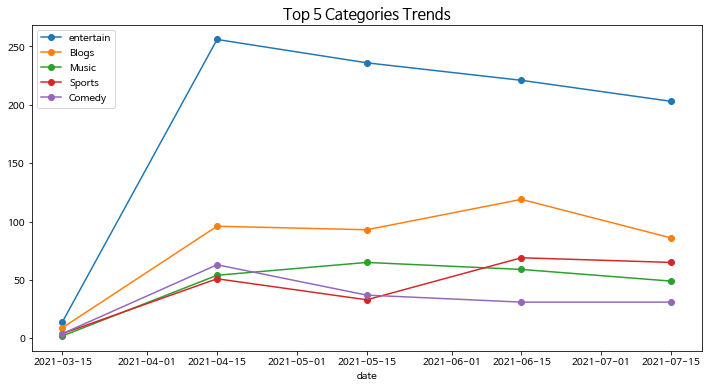

In [ ]:
format = '%Y-%m-%d'


# Preparation

fig = plt.figure(figsize=(12,6))  # 캔버스 생성
fig.set_facecolor('white') # 캔버스 색상 설정
ax = fig.add_subplot() # 프레임 생성


x = [datetime.datetime.strptime(d, format) for d in daterangelst]
ent = [ i.query('category_name == "Entertainment"').shape[0] for i in raw_dict['pub_date'].values() ]
blog = [ i.query('category_name == "People & Blogs"').shape[0] for i in raw_dict['pub_date'].values() ]
music = [ i.query('category_name == "Music"').shape[0] for i in raw_dict['pub_date'].values() ]
sport = [ i.query('category_name == "Sports"').shape[0] for i in raw_dict['pub_date'].values() ]
comedy = [ i.query('category_name == "Comedy"').shape[0] for i in raw_dict['pub_date'].values() ]
news = [ i.query('category_name == "News & Politics"').shape[0] for i in raw_dict['pub_date'].values() ]
style = [ i.query('category_name == "Howto & Style"').shape[0] for i in raw_dict['pub_date'].values() ]
game = [ i.query('category_name == "Gaming"').shape[0] for i in raw_dict['pub_date'].values() ]
film = [ i.query('category_name == "Film & Animation"').shape[0] for i in raw_dict['pub_date'].values() ]
science = [ i.query('category_name == "Science & Technology"').shape[0] for i in raw_dict['pub_date'].values() ]
auto = [ i.query('category_name == "Autos & Vehicles"').shape[0] for i in raw_dict['pub_date'].values() ]
edu = [ i.query('category_name == "Education"').shape[0] for i in raw_dict['pub_date'].values() ]
travel = [ i.query('category_name == "Travel & Events"').shape[0] for i in raw_dict['pub_date'].values() ]



ax.plot(x,ent,'o-', label="entertain")
ax.plot(x,blog,'o-', label="Blogs")
ax.plot(x,music,'o-', label="Music")
ax.plot(x,sport,'o-', label="Sports")
ax.plot(x,comedy,'o-', label="Comedy")



plt.xlabel('date')
plt.legend(loc=2)

plt.title('Top 5 Categories Trends',fontsize=15) ## 타이틀 설정
plt.show()


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8 missing from current font.
  font.set_text(s, 0, flags=flags)


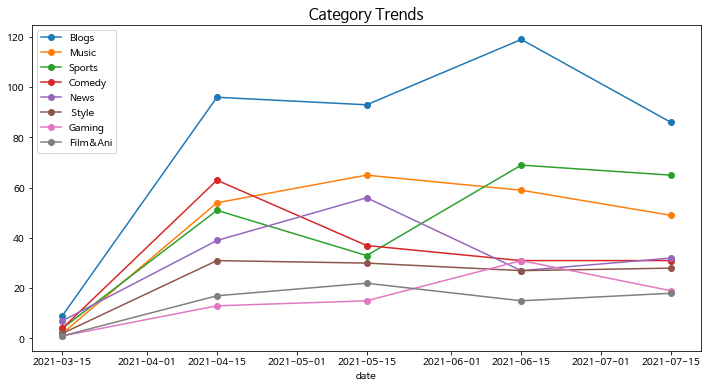

In [ ]:
format = '%Y-%m-%d'

# Preparation

fig1 = plt.figure(figsize=(12,6))  # 캔버스 생성
fig1.set_facecolor('white') # 캔버스 색상 설정
ax1 = fig1.add_subplot() # 프레임 생성



ax1.plot(x,blog,'o-', label="Blogs")
ax1.plot(x,music,'o-', label="Music")
ax1.plot(x,sport,'o-', label="Sports")
ax1.plot(x,comedy,'o-', label="Comedy")
ax1.plot(x,news,'o-', label="News")
ax1.plot(x,style,'o-', label="Style")
ax1.plot(x,game,'o-', label="Gaming")
ax1.plot(x,film,'o-', label="Film&Ani")


plt.xlabel('date')
plt.legend(loc=2)

plt.title('Category Trends',fontsize=15) ## 타이틀 설정
plt.show()


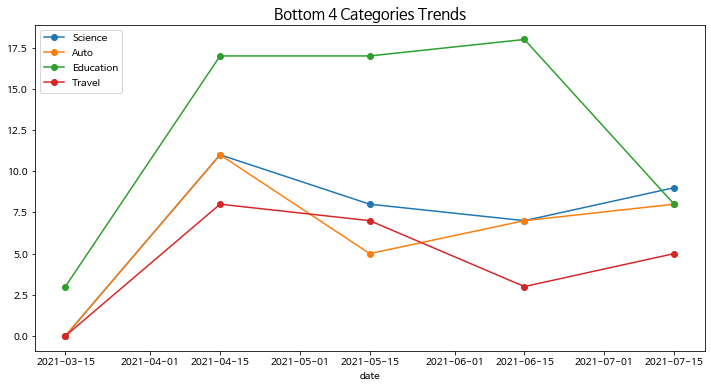

In [ ]:
format = '%Y-%m-%d'

# Preparation

fig1 = plt.figure(figsize=(12,6))  # 캔버스 생성
fig1.set_facecolor('white') # 캔버스 색상 설정
ax1 = fig1.add_subplot() # 프레임 생성



#y = [ i[i['category_name']=='Entertainment'].shape[0] for i in raw_dict['pub_date'].values() ]


ax1.plot(x,science,'o-', label="Science")
ax1.plot(x,auto,'o-', label="Auto")
ax1.plot(x,edu,'o-', label="Education")
ax1.plot(x,travel,'o-', label="Travel")


plt.xlabel('date')
plt.legend(loc=2)

plt.title('Bottom 4 Categories Trends',fontsize=15) ## 타이틀 설정
plt.show()


## 4️⃣ 인기 영상 태그 분포

In [ ]:
# raw_dict 에 월별로 태그 정보를 저장

raw_dict['tags'] = {}
mon = 3
for i in raw_dict['pub_date'].values():
  raw_dict['tags'][mon] = i['tags'].str.split('|')
  mon +=1


In [ ]:
# dict key 확인
raw_dict['tags'].keys()

dict_keys([3, 4, 5, 6, 7])

In [ ]:
# 월별 태그 분포 시각화 함수
def visualtags(mon, title):
  '''
  mon: key 값 (월, int)
  title: graph title name (str)
  '''
  taglst = []
  for t in raw_dict['tags'][mon][raw_dict['tags'][mon].notnull()]:
    taglst += t

  # 시각화
  fig = plt.figure(figsize=(25,12))  

  values = pd.Series(taglst).value_counts()[:30].to_list()
  xlabels = pd.Series(taglst).value_counts()[:30].index.to_list()

  colors = sns.color_palette('hls',30) 
  plt.rc('font', family='NanumBarunGothic') 

  plt.bar(np.arange(30), values, color=colors)
  plt.xticks(np.arange(30), xlabels, fontsize=15, rotation = 45)

  plt.title(f'{title} Top 30 Tags',fontsize=25) ## 타이틀 설정

  plt.show()
  

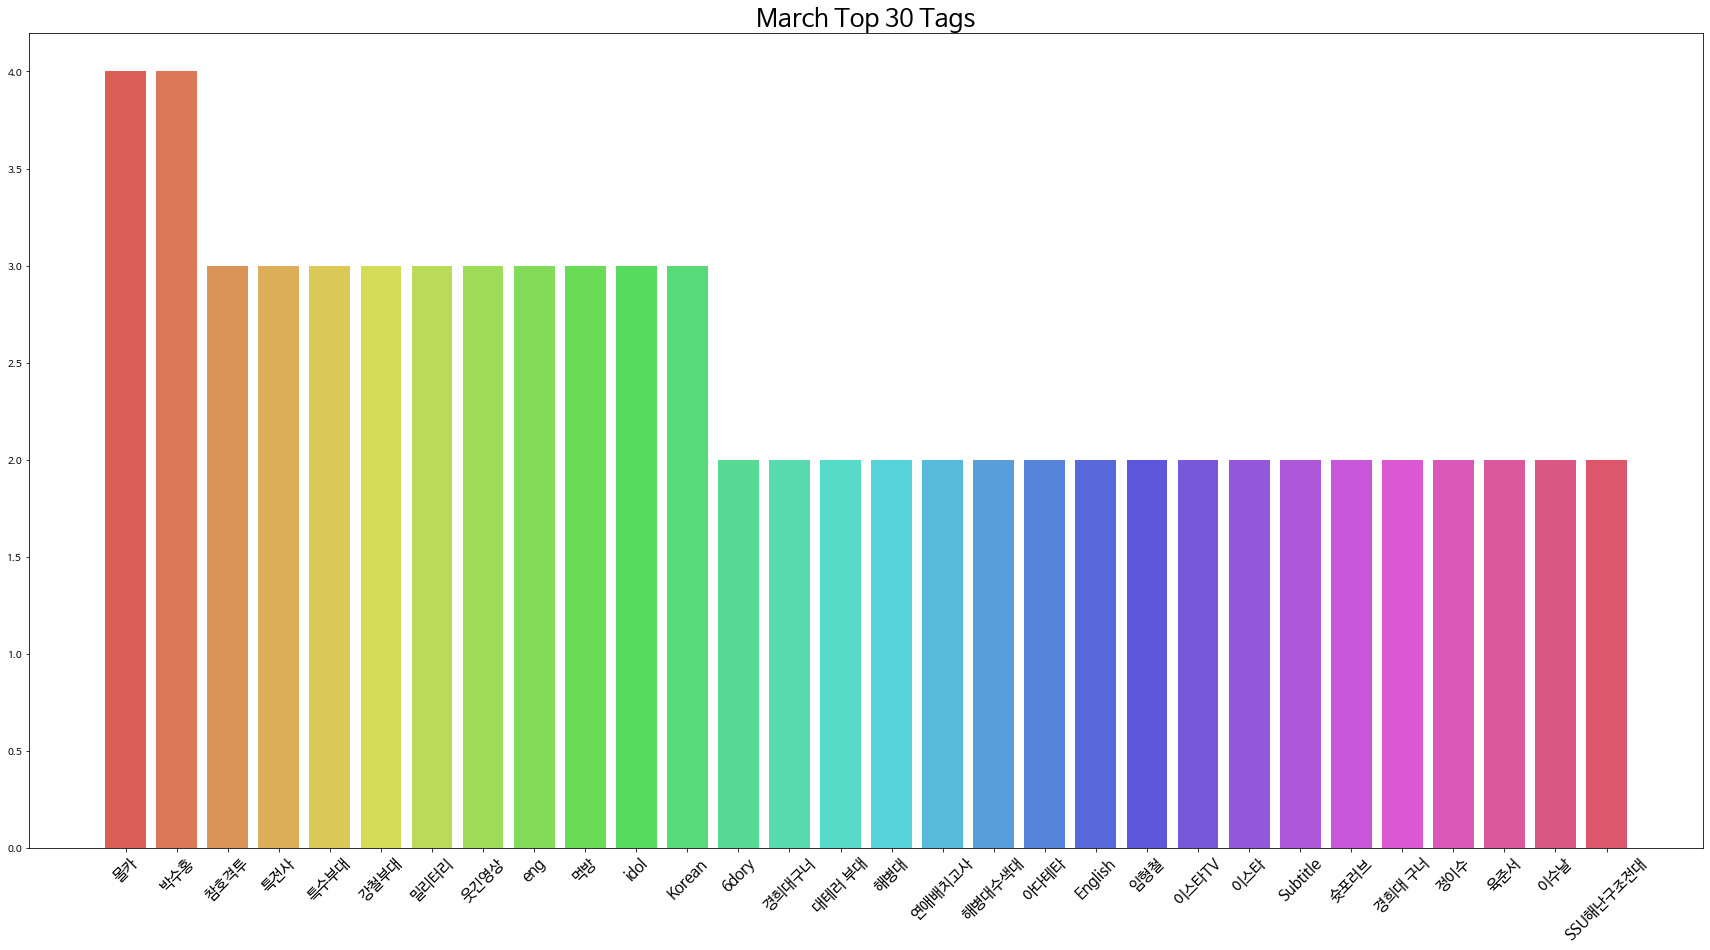

In [ ]:
visualtags(3, 'March')

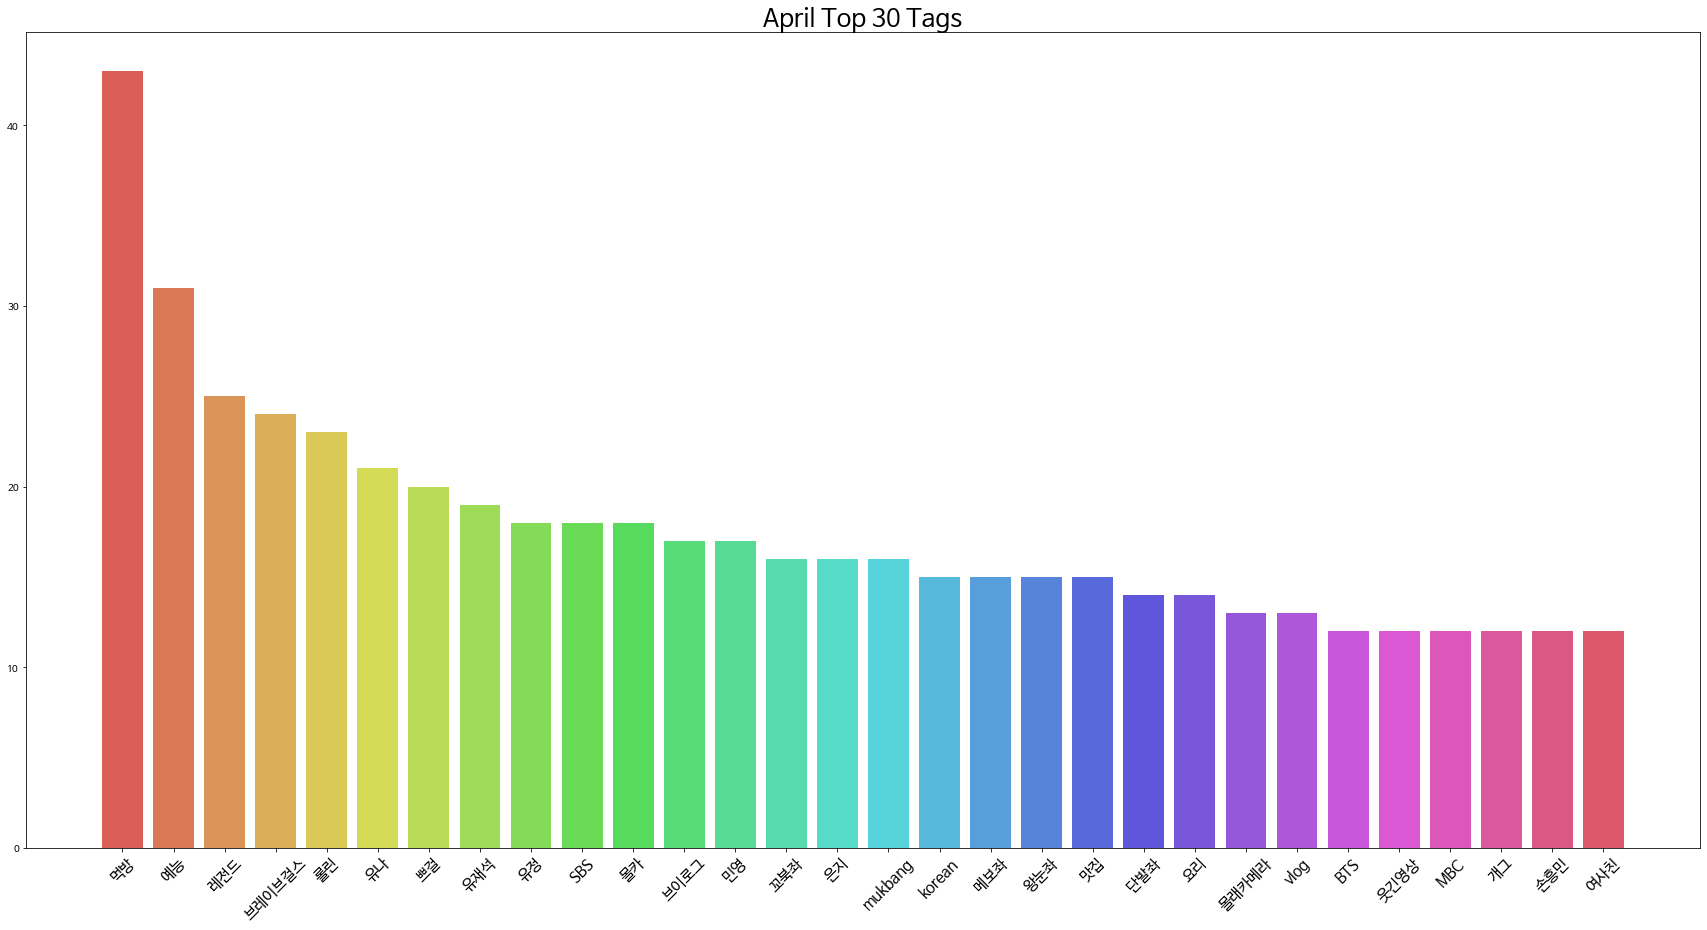

In [ ]:
visualtags(4, 'April')

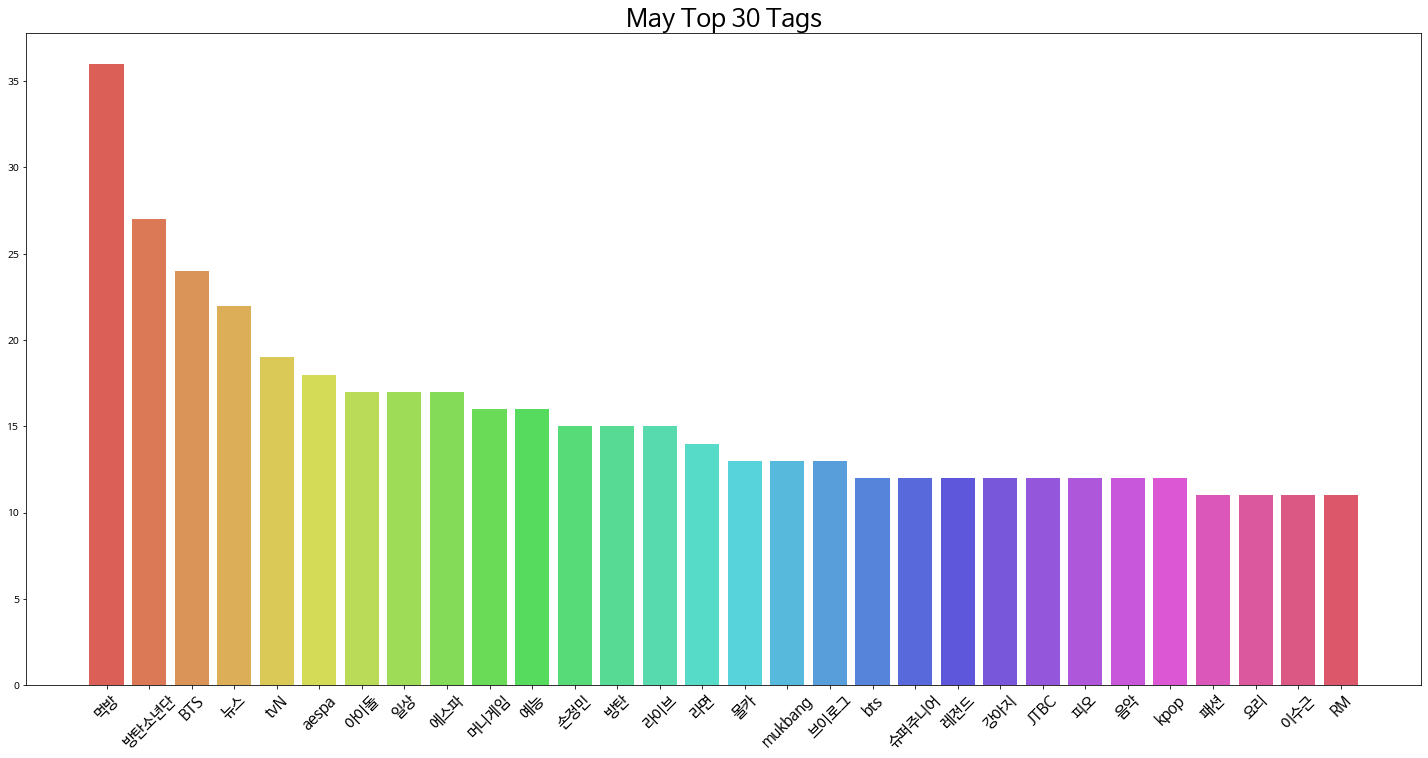

In [ ]:
visualtags(5, 'May')

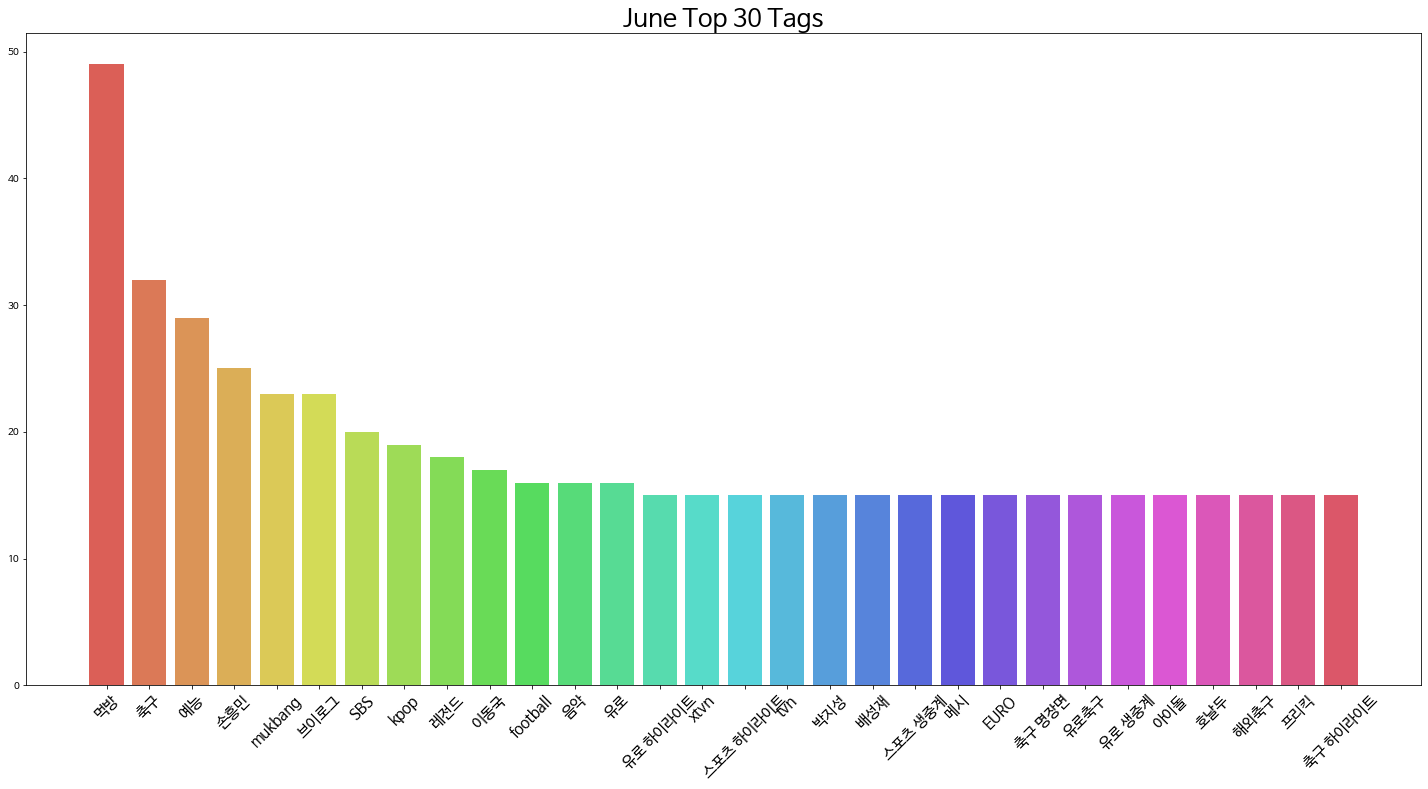

In [ ]:
visualtags(6, 'June')

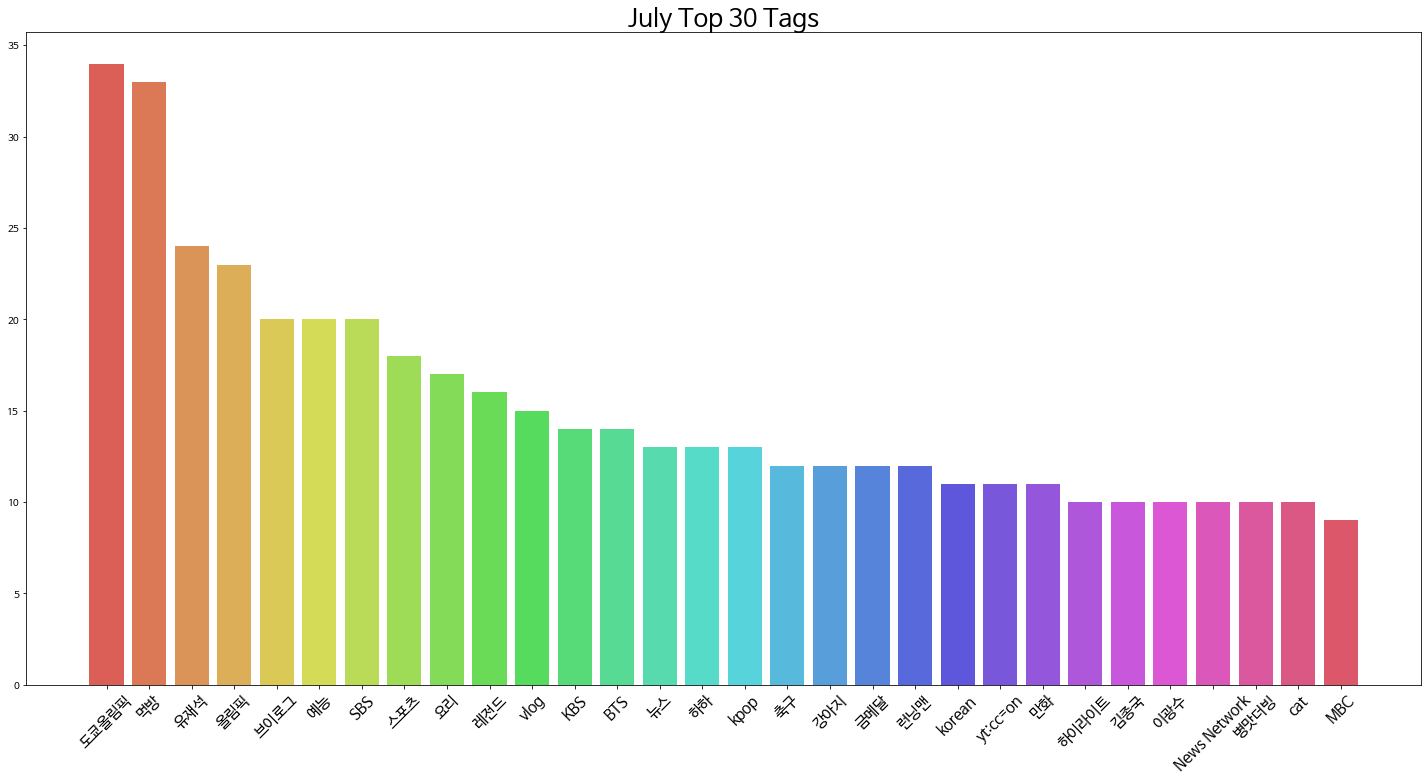

In [ ]:
visualtags(7, 'July')

## 5️⃣ 주차별 분류

In [ ]:
# 날짜로 sorting
pretest.sort_values(by='published_date', inplace=True)

In [ ]:
# 날짜를 set index
df = pretest.set_index(pretest['published_date'])

In [ ]:
# dummies 변수를 channel_id 기준으로 생성
df1 = pd.get_dummies(df['channel_id'], columns=['channel_id'])

In [ ]:
# 주 단위로 sum() 한 df 생성
weekly_df = df1.resample(rule='W').sum()
weekly_df

,CH-0C8y,CH-9RQC,CH-BqPA,CH-Bsa2,CH-FQUI,CH-IBt8,CH-IG_h,CH-IYpd,CH-Jblc,CH-KafR,...,CHzRDCw,CHzgNzU,CHzgxx_,CHzhyI5,CHzjDgV,CHzjiRW,CHznImS,CHzt24f,CHzxXBQ,CHzz58-
published_date,,,,,,,,,,,,,,,,,,,,,
2021-03-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-04-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-04-11,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2021-04-18,0,0,2,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-04-25,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-05-02,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-05-09,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2021-05-16,0,0,0,1,0,0,0,0,1,0,...,2,0,0,1,0,0,1,0,0,0
2021-05-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 주단위 시각화 함수

def weekly_top5_ch(weekly_df, idx, titlename):
  fig = plt.figure(figsize=(7,5))  # 캔버스 생성

  values = weekly_df.iloc[idx].sort_values(ascending=False)[:5].to_list()
  xlabels = weekly_df.iloc[idx].sort_values(ascending=False)[:5].index.to_list()

  colors = sns.color_palette('hls',5) 

  plt.bar(np.arange(5), values, color=colors)
  plt.xticks(np.arange(5), xlabels)
  plt.title(f'21 {titlename} Top 5 Channels',fontsize=15) ## 타이틀 설정

  plt.show()

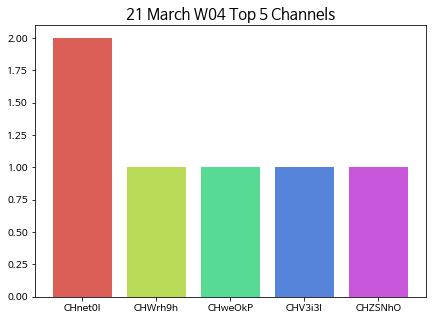

In [ ]:
weekly_top5_ch(weekly_df, 0, 'March W04')

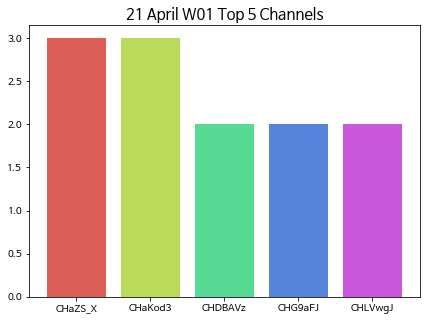

In [ ]:
weekly_top5_ch(weekly_df, 1, 'April W01')

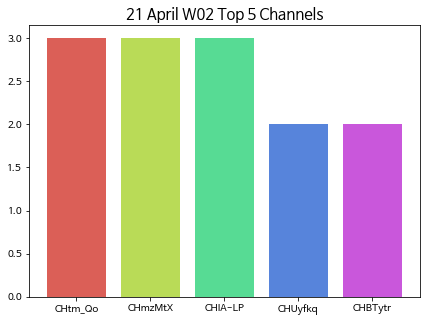

In [ ]:
weekly_top5_ch(weekly_df, 2, 'April W02')

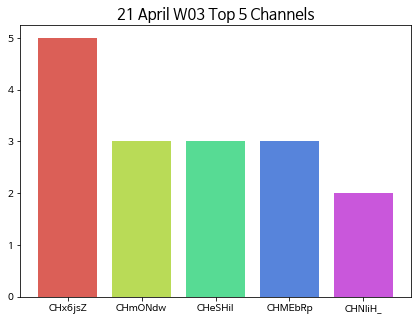

In [ ]:
weekly_top5_ch(weekly_df, 3, 'April W03')

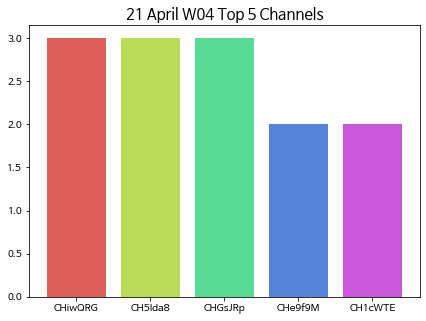

In [ ]:
weekly_top5_ch(weekly_df, 4, 'April W04')

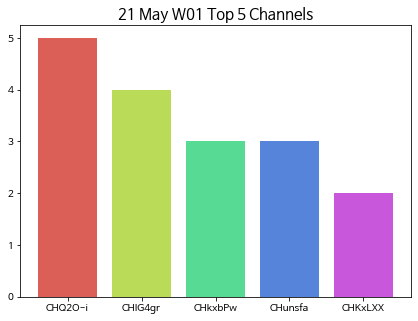

In [ ]:
weekly_top5_ch(weekly_df, 5, 'May W01')

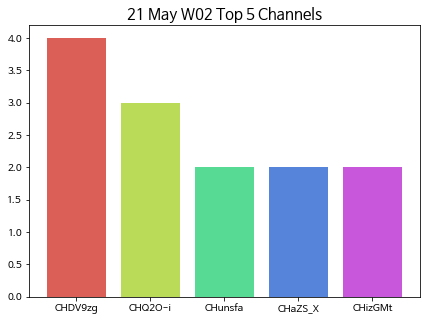

In [ ]:
weekly_top5_ch(weekly_df, 6, 'May W02')

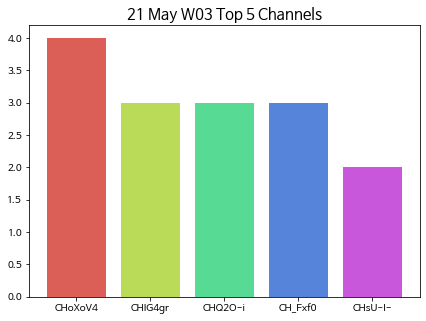

In [ ]:
weekly_top5_ch(weekly_df, 7, 'May W03')

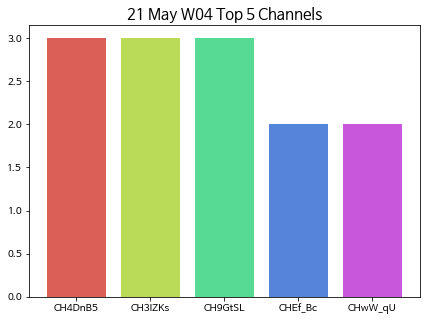

In [ ]:
weekly_top5_ch(weekly_df, 8, 'May W04')

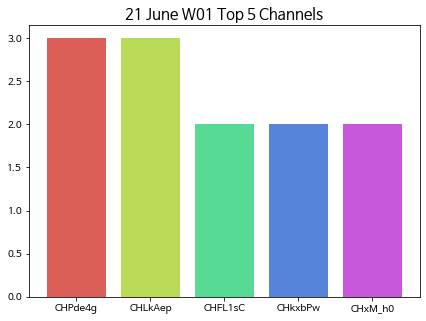

In [ ]:
weekly_top5_ch(weekly_df, 9, 'June W01')

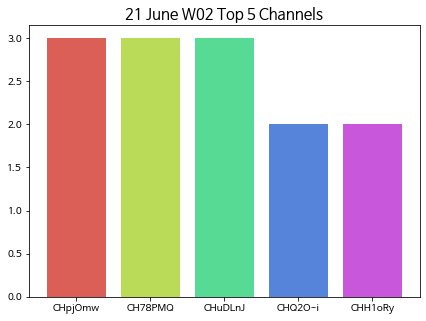

In [ ]:
weekly_top5_ch(weekly_df, 10, 'June W02')

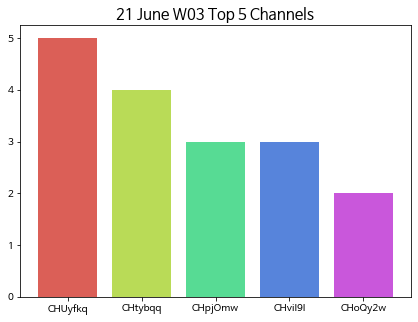

In [ ]:
weekly_top5_ch(weekly_df, 11, 'June W03')

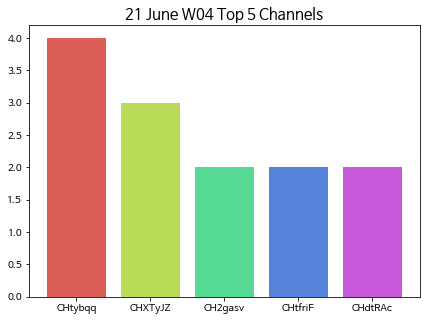

In [ ]:
weekly_top5_ch(weekly_df, 12, 'June W04')

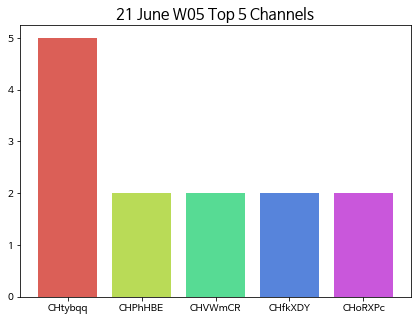

In [ ]:
weekly_top5_ch(weekly_df, 13, 'June W05')

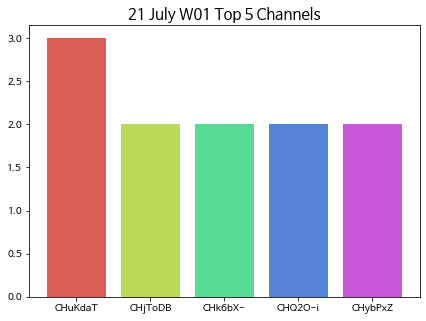

In [ ]:
weekly_top5_ch(weekly_df, 14, 'July W01')

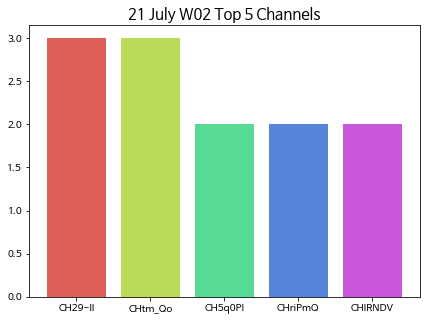

In [ ]:
weekly_top5_ch(weekly_df, 15, 'July W02')

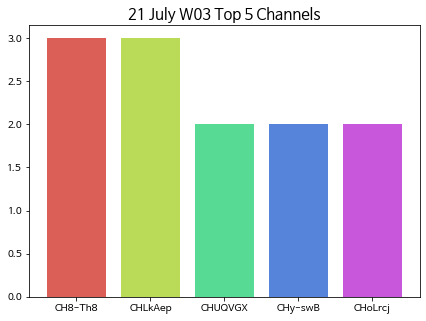

In [ ]:
weekly_top5_ch(weekly_df, 16, 'July W03')

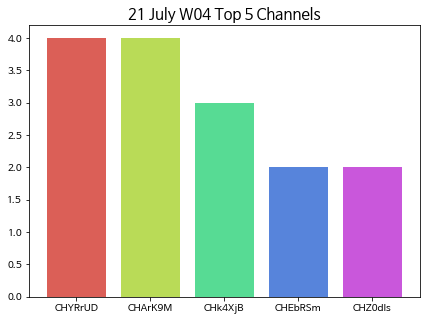

In [ ]:
weekly_top5_ch(weekly_df, 17, 'July W04')

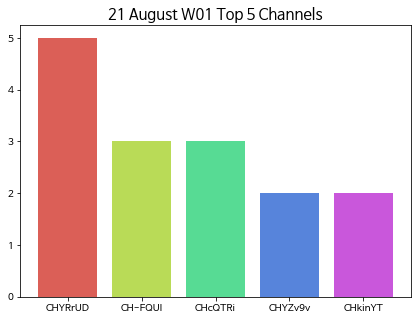

In [ ]:
weekly_top5_ch(weekly_df, 18, 'August W01')

# 2. 새로운 지표 생성

<h2> 1️⃣ trending_duration 생성


> 인기 동영상에 랭크된 기간



In [ ]:
pretest.columns

Index(['video_id', 'channel_id', 'published_date', 'category_name', 'duration',
       'tags', 'description', 'on_trending_date', 'off_trending_date',
       'on_rank', 'off_rank', 'on_views', 'off_views', 'on_likes', 'off_likes',
       'on_dislikes', 'off_dislikes', 'on_comments', 'off_comments',
       'on_channel_subscribers', 'off_channel_subscribers',
       'on_channel_total_views', 'off_channel_total_views',
       'on_channel_total_videos', 'off_channel_total_videos', 'channel_freq'],
      dtype='object')

In [ ]:
pretest.dtypes

video_id                    object
channel_id                  object
published_date              object
category_name               object
duration                    object
tags                        object
description                 object
on_trending_date            object
off_trending_date           object
on_rank                      int64
off_rank                     int64
on_views                     int64
off_views                    int64
on_likes                     int64
off_likes                    int64
on_dislikes                  int64
off_dislikes                 int64
on_comments                  int64
off_comments                 int64
on_channel_subscribers       int64
off_channel_subscribers      int64
on_channel_total_views       int64
off_channel_total_views      int64
on_channel_total_videos      int64
off_channel_total_videos     int64
channel_freq                 int64
dtype: object

In [ ]:
# 인기 동영상 게시 날짜 datetime 으로 변환

format = '%Y-%m-%d'
pretest['off_trending_date'] = pretest['off_trending_date'].apply(lambda x: datetime.datetime.strptime(x,format))
pretest['on_trending_date'] = pretest['on_trending_date'].apply(lambda x: datetime.datetime.strptime(x,format))
pretest.dtypes

video_id                            object
channel_id                          object
published_date                      object
category_name                       object
duration                            object
tags                                object
description                         object
on_trending_date            datetime64[ns]
off_trending_date           datetime64[ns]
on_rank                              int64
off_rank                             int64
on_views                             int64
off_views                            int64
on_likes                             int64
off_likes                            int64
on_dislikes                          int64
off_dislikes                         int64
on_comments                          int64
off_comments                         int64
on_channel_subscribers               int64
off_channel_subscribers              int64
on_channel_total_views               int64
off_channel_total_views              int64
on_channel_

In [ ]:
# 일 수 차이 계산
diff = [(off-on).days for off, on in zip(pretest['off_trending_date'], pretest['on_trending_date'])]
len(diff)

2644

In [ ]:
# diff 를 pretest 새로운 feature 로 생성
pretest['trending_duration'] = diff
pretest[['on_trending_date', 'off_trending_date', 'trending_duration']]

,on_trending_date,off_trending_date,trending_duration
0,2021-07-03,2021-07-04,1
1,2021-06-26,2021-06-27,1
2,2021-07-19,2021-07-22,3
3,2021-06-04,2021-06-04,0
4,2021-07-08,2021-07-09,1
...,...,...,...
2639,2021-05-11,2021-05-14,3
2640,2021-07-31,2021-07-31,0
2641,2021-04-22,2021-04-22,0
2642,2021-04-28,2021-04-29,1


In [ ]:
# 최장 기간 7일 동안 인기 영상들을 보자

pretest[pretest['trending_duration'] == 7]

#  --> 1개, 방탄소년단 Butter MV 이다.

,video_id,channel_id,published_date,category_name,duration,tags,description,on_trending_date,off_trending_date,on_rank,...,off_dislikes,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos,trending_duration
1384,VWMwe,CH3IZKs,2021-05-21,Music,PT3M3S,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...,2021-05-22,2021-05-29,1,...,133721,4625133,6659938,55800000,56700000,16330550808,16770303209,603,609,7


In [ ]:
# 최장 기간 6일 동안 인기 영상들을 보자

print(pretest[pretest['trending_duration'] == 6]['description'].iloc[0], '\n')
print(pretest[pretest['trending_duration'] == 6]['description'].iloc[1])


#  --> 2개, 아이유 킬링벌스 & BTS 'Permission to Dance'

# 가장 오랫동안 인기 있던 영상은 K-pop contents 가 강세
# 그렇다면 일반인 중에는 없을까?

0:00 하루 끝02:05 금요일에 만나요03:09 너의 의미04:55 스물셋06:18 밤편지07:57 팔레트09:10 가을 아침10:46 삐삐11:47 Blueming13:14 에잇14:15 Coin15:32 라일락17:07​ 내 손을 잡아 (앵콜)▶딩고뮤직 (Dingo Music) : http://bit.ly/Dingo__Music▶딩고프리스타일 (Dingo Freestyle) : http://bit.ly/Dingo__Freestyle▶일소라 (일반인들의 소름돋는 라이브) : http://bit.ly/ilsoracontact : musicbiz@makeus.com#아이유 #IU #킬링보이스 #라일락 #COIN #국힙원탑#딩고뮤직 #DingoMusic 

BTS (방탄소년단) 'Permission to Dance' Official MVCredits:Director: Yong Seok Choi (Lumpens) & Woogie Kim (MOTHER)-SEOUL credits:1st AD: Jihye Yoon (Lumpens)2nd AD: Ran Ro (Lumpens)PA: Soeyoung Park, Chanyang KimProducer: Emma Sungeun Kim (GE Production)Production manager: Park Jin SungAssistant Production: Seo Min ho, Kim Byeongman, Choi Seung Won, Ahn Joo Young, Kim AreumDirector of Photography: Hyunwoo Nam (MOTHER)Focus Puller: Sangwoo Yun2nd AC: Eunki Kim3rd AC: Youngseo ParkDIT: Minjoo YouB Camera Operator: EumkoJimmy Jib: Youngjoong Kim, Hyun In Kim, Sunghoon KimTechno Crane: Service VisionGaffer: Song Hyunsuk (Real Lig

In [ ]:
# 3일 이상 인기 영상들을 보자

for idx, i in enumerate(pretest[pretest['trending_duration'] == 3]['description'][:20]):
  print(idx, i,'\n')

0 한번 도와주세요... https://goo.gl/iNlwTD#투명인간 #은형법 #한의학 #양의학 #수의학 #민간요법 #장의사 #장의사우마 #우마 # 우마UMA #UMA #가면 #마스크 #병맛 #꿀잼 #허준 #동의보감구독하기! SUBSCRIBE!!  https://goo.gl/iNlwTD※ 세상에나 마상에나 시리즈 ▶ https://goo.gl/rE7zqB※ 몰래카메라 시리즈 ▶ https://goo.gl/8tCDYF※ 핫소스 시리즈 ▶https://goo.gl/hQJqI3※ 낚시, 요리 시리즈 https://goo.gl/ghwjDZ[인스타그램] www.instagram.com/uma.u.m.a/ ＊공유는 가능하지만 불펌은 하지 마세요.-------------------------------------------------------------------------------------------------------------Track : 서리꽃 (Frost flower)Composer : 눈솔Watch : https://youtu.be/8Erdny-jZW4​------------------------------------------------------------------------------------------------------------- 

1 다음 영상을 위해 구독해주세요 !Please subscribe for the next video동현 인스타https://www.instagram.com/kldh_dh/나현 인스타 https://www.instagram.com/nahyeonzzi/#황의조 #삼비아 #마비디디 

2 형철띠.. 제가 연애고수로 만들어 드릴게요..이수타TV 만만세-비즈니스 메일 : eesoonal.fc@gmail.com인스타그램 : http://www.instagram.com/eesoo_j 

3 #깨방정 #몰카 #정승빈#훈남 #존잘남 #몸짱 #피트니스모델 #박영호#재밌는영상 #웃긴영상 #몰래카메라 #prank #kprank

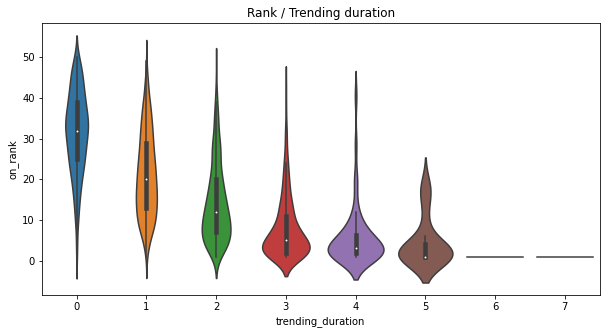

In [ ]:
# on_rank / trending_duration visualization
fig = plt.figure(figsize=(10,5))  # 캔버스 생성
sns.violinplot(data = pretest, x = "trending_duration", y = "on_rank")
plt.title('Rank / Trending duration', fontsize=12)
plt.show()

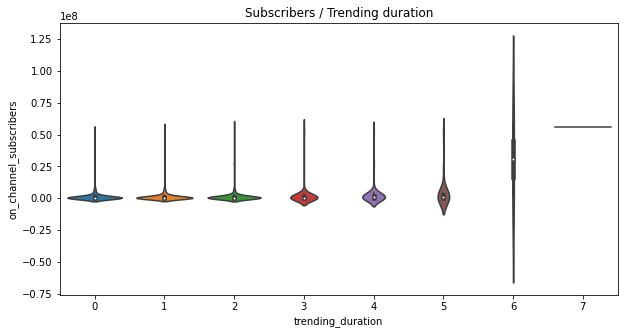

In [ ]:
fig = plt.figure(figsize=(10,5))  # 캔버스 생성
sns.violinplot(data = pretest, x = "trending_duration", y = "on_channel_subscribers")
plt.title('Subscribers / Trending duration', fontsize=12)
plt.show()

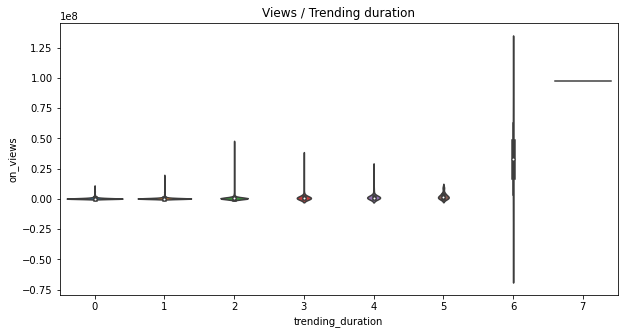

In [ ]:
fig = plt.figure(figsize=(10,5))  # 캔버스 생성
sns.violinplot(data = pretest, x = "trending_duration", y = "on_views")
plt.title('Views / Trending duration', fontsize=12)
plt.show()

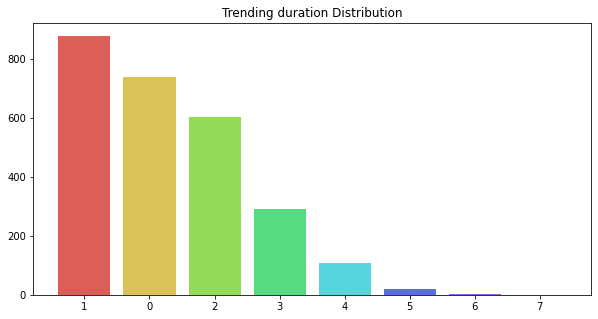

In [ ]:
# 전체 인기동영상 랭크 기간 분포 시각화
fig = plt.figure(figsize=(10,5))  # 캔버스 생성

values = pretest['trending_duration'].value_counts().to_list()    # y값 values 저장
xlabels = pretest['trending_duration'].value_counts().index.to_list()   # x축 이름 저장

colors = sns.color_palette('hls',len(xlabels)) 

plt.bar(range(len(xlabels)), values, color=colors)
plt.xticks( range(len(xlabels)), xlabels)
plt.title('Trending duration Distribution', fontsize=12)


plt.show()

<h2> 3️⃣ 영상 길이별 분류

In [ ]:
du = pretest['duration'].apply(lambda x: x[:x.find('M')].replace('PT','').replace('H',','))

In [ ]:
# 분 단위로 바꾸는 과정
playtime = []
for idx,i in enumerate(du):
  dulst = i.split(',')
  if len(dulst) == 2:
    playtime.append(int(dulst[0])*60 + int(dulst[1]))
  elif len(dulst) == 1:
    playtime.append(int(dulst[0]))


In [ ]:
# pretest 에 분단위 영상시간 저장
pretest['playtime'] = playtime

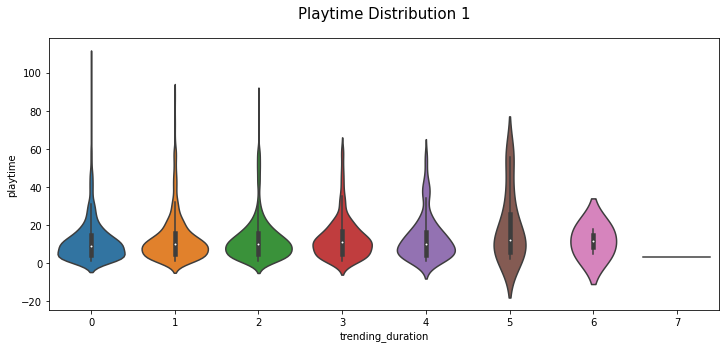

In [ ]:
plt.figure(figsize=(12, 5)) 
plt.title("Playtime Distribution 1", y = 1.05, size = 15) 
sns.violinplot(data = pretest, x = "trending_duration", y = "playtime")

plt.show()

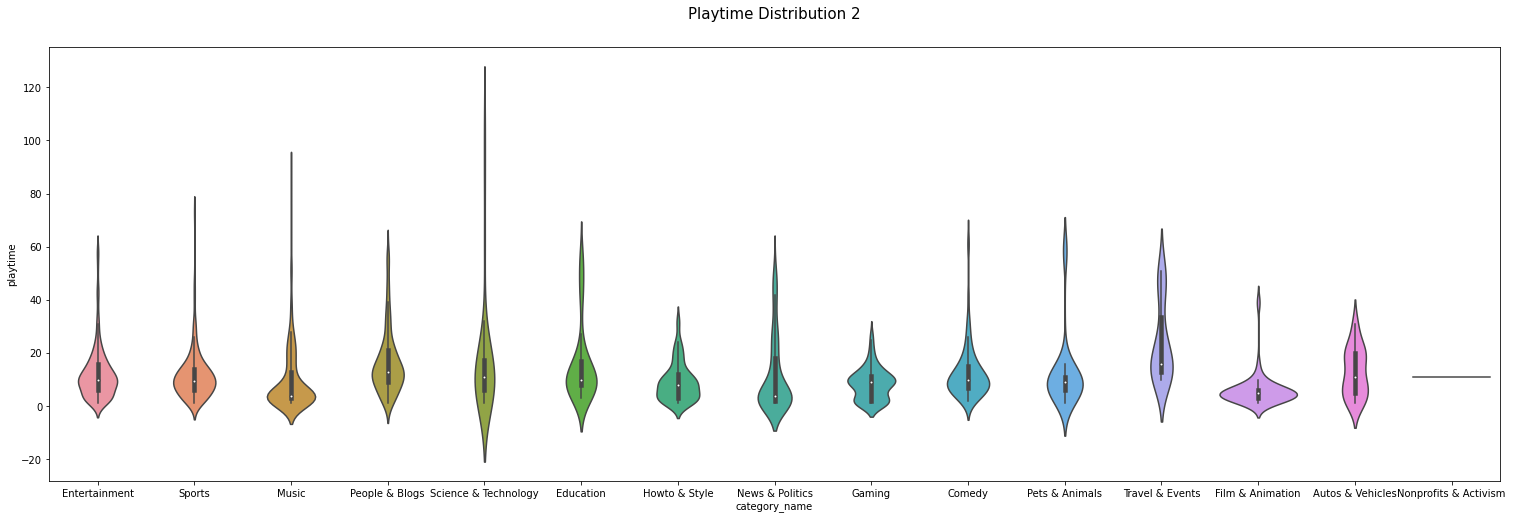

In [ ]:
plt.figure(figsize=(26, 8)) 
plt.title("Playtime Distribution 2", y = 1.05, size = 15) 
sns.violinplot(data = pretest, x = "category_name", y = "playtime")

plt.show()

In [ ]:
pretest.columns

Index(['video_id', 'channel_id', 'published_date', 'category_name', 'duration',
       'tags', 'description', 'on_trending_date', 'off_trending_date',
       'on_rank', 'off_rank', 'on_views', 'off_views', 'on_likes', 'off_likes',
       'on_dislikes', 'off_dislikes', 'on_comments', 'off_comments',
       'on_channel_subscribers', 'off_channel_subscribers',
       'on_channel_total_views', 'off_channel_total_views',
       'on_channel_total_videos', 'off_channel_total_videos', 'freq',
       'channel_freq', 'playtime', 'trending_duration'],
      dtype='object')

In [ ]:
# heatmap data 인덱싱
heatmap_data = pretest[['on_rank', 'off_rank', 'on_views', 'off_views', 'on_likes', 'off_likes',
       'on_dislikes', 'off_dislikes', 'on_comments', 'off_comments',
       'on_channel_subscribers', 'off_channel_subscribers',
       'on_channel_total_views', 'off_channel_total_views',
       'on_channel_total_videos', 'off_channel_total_videos',
       'trending_duration','channel_freq','playtime']]

In [ ]:
heatmap_data.astype(float).corr()['trending_duration']

on_rank                    -0.645049
off_rank                    0.255335
on_views                    0.205585
off_views                   0.228989
on_likes                    0.161418
off_likes                   0.173119
on_dislikes                 0.187994
off_dislikes                0.223849
on_comments                 0.136375
off_comments                0.137761
on_channel_subscribers      0.101315
off_channel_subscribers     0.102675
on_channel_total_views      0.084059
off_channel_total_views     0.085417
on_channel_total_videos     0.007297
off_channel_total_videos    0.007769
trending_duration           1.000000
channel_freq                0.145573
playtime                    0.051419
Name: trending_duration, dtype: float64

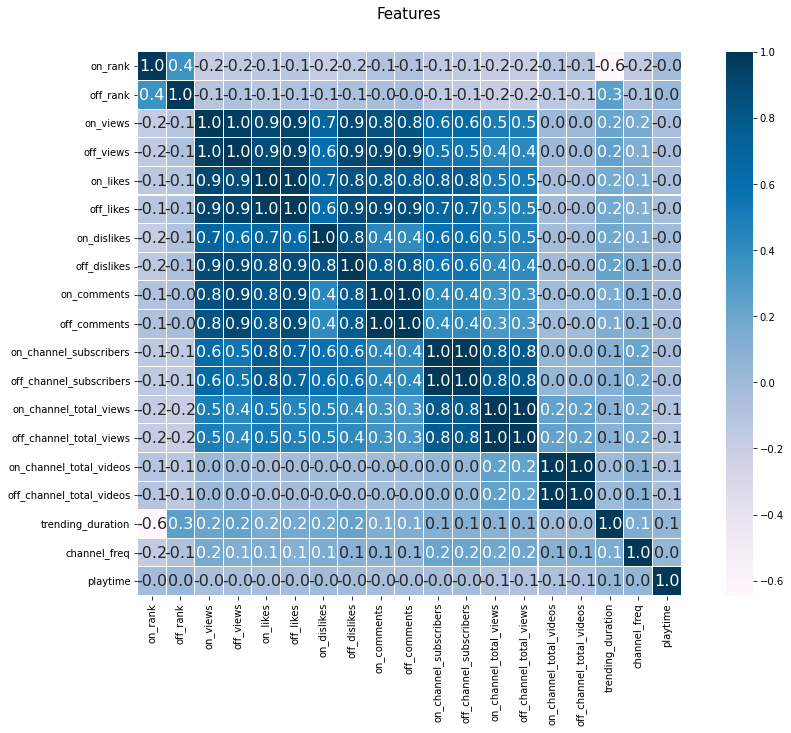

In [ ]:
colormap = plt.cm.PuBu 
plt.figure(figsize=(16, 10)) 
plt.title("Features", y = 1.05, size = 15) 
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, fmt= '.1f', 
            cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})


In [ ]:
# on_rank 상관관계만 보기
heatmap_data.astype(float).corr()['on_rank']

on_rank                     1.000000
off_rank                    0.360355
on_views                   -0.173836
off_views                  -0.157961
on_likes                   -0.135078
off_likes                  -0.122635
on_dislikes                -0.176558
off_dislikes               -0.155592
on_comments                -0.075361
off_comments               -0.072130
on_channel_subscribers     -0.145809
off_channel_subscribers    -0.146407
on_channel_total_views     -0.172543
off_channel_total_views    -0.173227
on_channel_total_videos    -0.098883
off_channel_total_videos   -0.099022
trending_duration          -0.645049
channel_freq               -0.168101
playtime                   -0.027407
Name: on_rank, dtype: float64

In [ ]:
# fandom index 다양하게 시도

on_like = np.array(pretest.on_channel_subscribers)
on_comment = np.array(pretest.on_comments)
on_subscribers = np.array(pretest.on_channel_subscribers)
on_dislike = np.array(pretest.on_dislikes)
on_view = np.array(pretest.on_views)
on_totalview = np.array(pretest.on_channel_total_views)
on_totalvideo = np.array(pretest.on_channel_total_videos)
on_freq = np.array(pretest.channel_freq)



#pretest['fandom_index'] = on_like * on_dislike * on_veiw  # r -0.21 / d 0.161
#pretest['fandom_index'] = on_like + on_dislike + on_veiw  # r -0.35 / d 0.186
#pretest['fandom_index'] = 2*on_like + on_dislike + on_view  # r -0.31 / d 0.163
#pretest['fandom_index'] = on_like + on_dislike + 2*on_view  # r -0.396 / d 0.211 
#pretest['fandom_index'] = on_like + on_dislike + 3*on_view  # r -0.418 / d 0.224 
#pretest['fandom_index'] = on_like + on_dislike + 4*on_view  # r -0.431 / d 0.233 
#pretest['fandom_index'] = on_like + on_dislike + 5*on_view  # r -0.440 / d 0.239 

#pretest['fandom_index'] = on_like + on_dislike + 100*on_view  # r -0.476 / d 0.274
#pretest['fandom_index'] = on_like + on_dislike + 200*on_view  # r -0.477 / d 0.275
pretest['fandom_index'] = on_like + on_dislike + 300*on_view  # r -0.477 / d 0.276 best

#pretest['fandom_index'] = on_like + on_dislike + 330*on_view  # r -0.476 / d 0.276 --> 감소
#pretest['fandom_index'] = 5*on_like + on_dislike + 300*on_view  # r -0.475 / d 0.272 --> 감소
#pretest['fandom_index'] = on_like + 10*on_dislike + 300*on_view  # 큰 변화 X, d 감소
#pretest['fandom_index'] = on_like + on_dislike + 300*on_view + 100*on_freq # 큰 변화 X

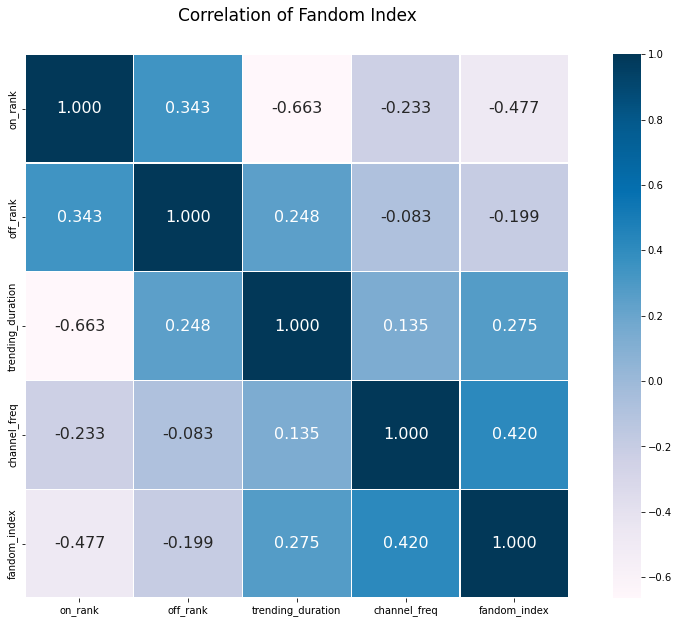

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

heatmap_data3 = pretest[['on_rank', 'off_rank', 'trending_duration', 'channel_freq','fandom_index']]

heatmap_data3['on_rank'] = np.log1p(heatmap_data3.on_rank)
heatmap_data3['off_rank'] = np.log1p(heatmap_data3.off_rank)
heatmap_data3['trending_duration'] = np.log1p(heatmap_data3.trending_duration)
heatmap_data3['channel_freq'] = np.log1p(heatmap_data3.channel_freq)
heatmap_data3['fandom_index'] = np.log1p(heatmap_data3.fandom_index)


colormap = plt.cm.PuBu 
plt.figure(figsize=(16, 10)) 
plt.title("Correlation of Fandom Index", y = 1.05, size = 17) 
sns.heatmap(heatmap_data3.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, fmt= '.3f', 
            cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})


In [ ]:
pretest['fandom_index'].describe()

count    2.644000e+03
mean     2.877872e+08
std      9.636310e+08
min      1.890000e+06
25%      7.098009e+07
50%      1.292725e+08
75%      2.498487e+08
max      2.923881e+10
Name: fandom_index, dtype: float64

# 😄 Bonus

In [ ]:
# 침착맨 tag 된 영상
tagpre = pretest[pretest['tags'].notnull()]
tagpre[tagpre['tags'].str.contains('침착맨')]

,video_id,channel_id,published_date,category_name,duration,tags,description,on_trending_date,off_trending_date,on_rank,...,on_dislikes,off_dislikes,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos
1285,VTPnv,CHxQXvv,2021-05-20,Entertainment,PT14M17S,이말년|침착맨|주호민|침착맨 주호민|침펄|주펄|말년을건강하게|김계란|피지컬갤러리|운...,침착맨의 노후대비 운동입문기‘말년을 건강하게’매주 목요일 오후 6시!3대 100(?...,2021-05-22,2021-05-22,34,...,69,69,1086,1086,89600,89600,12932484,12932484,56,56
1528,V_5Va,CHxQXvv,2021-06-10,Entertainment,PT14M10S,이말년|침착맨|주호민|침착맨 주호민|침펄|주펄|말년을건강하게|기안84|기안|희민|기...,침착맨의 노후대비 운동입문기‘말년을 건강하게’매주 목요일 오후 6시!(경)기안84 ...,2021-06-12,2021-06-13,10,...,164,214,1545,1690,105000,106000,16521490,16925969,68,69
1575,VaCsK,CHC1LvV,2021-06-18,Entertainment,PT43S,침착맨|이말년|침투부,"▶【짧은 클립, 짤착맨】 재생목록: https://youtube.com/playli...",2021-06-22,2021-06-22,33,...,377,377,1943,1943,124000,124000,25426827,25426827,284,284
147,V2n-i,CHhE5nZ,2021-07-21,Entertainment,PT7M24S,공대생|파뿌리|핫도그|공피디|근황|01커플|침착맨|감스트|보물섬|핫소스|보따,#공대생 #공피디 #근황문의는 gds@videovillage.co.krhjsbjh2...,2021-07-23,2021-07-24,35,...,162,174,752,761,2070000,2070000,1359029973,1360019108,1421,1422


In [ ]:
tagpre = pretest[pretest['description'].notnull()]
tagpre[tagpre['description'].str.contains('침착맨')]  # --> CHUj6rr	이 침착맨 channel_id

,video_id,channel_id,published_date,category_name,duration,tags,description,on_trending_date,off_trending_date,on_rank,...,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos,channel_freq,trending_duration,playtime,fandom_index
941,VKhis,CHUj6rr,2021-06-10,Entertainment,PT9M35S,NaN,▶침착맨의 【식욕저하 다이어트 먹방】 영상 모음: https://url.kr/a4v...,2021-06-12,2021-06-13,20,...,977000,979000,582401197,583612212,5813,5814,2,1,9,168146175
1285,VTPnv,CHxQXvv,2021-05-20,Entertainment,PT14M17S,이말년|침착맨|주호민|침착맨 주호민|침펄|주펄|말년을건강하게|김계란|피지컬갤러리|운...,침착맨의 노후대비 운동입문기‘말년을 건강하게’매주 목요일 오후 6시!3대 100(?...,2021-05-22,2021-05-22,34,...,89600,89600,12932484,12932484,56,56,4,0,14,82802669
1312,VUPXl,CHUj6rr,2021-06-20,Entertainment,PT15M1S,NaN,▶침착맨의 【일상재롱 영상】 모음: https://goo.gl/OJ4Uoa▶침투부 ...,2021-06-22,2021-06-23,35,...,997000,1000000,593760572,594975944,5823,5824,2,1,15,133136048
1528,V_5Va,CHxQXvv,2021-06-10,Entertainment,PT14M10S,이말년|침착맨|주호민|침착맨 주호민|침펄|주펄|말년을건강하게|기안84|기안|희민|기...,침착맨의 노후대비 운동입문기‘말년을 건강하게’매주 목요일 오후 6시!(경)기안84 ...,2021-06-12,2021-06-13,10,...,105000,106000,16521490,16925969,68,69,4,1,14,195106364
1575,VaCsK,CHC1LvV,2021-06-18,Entertainment,PT43S,침착맨|이말년|침투부,"▶【짧은 클립, 짤착맨】 재생목록: https://youtube.com/playli...",2021-06-22,2021-06-22,33,...,124000,124000,25426827,25426827,284,284,1,0,43,141380877
2584,VyJcE,CHvG7co,2021-04-28,People & Blogs,PT22M18S,카트라이더|쌍베|쌍튜브|와우|스트리머|트위터|배틀그라운드|스팀|종합게임|게임방송|핫...,#부산#침착맨#풀코스트위치 LIVE 매일 2시 ▼ https://www.twitc...,2021-04-30,2021-05-01,37,...,148000,148000,57675515,57785284,1937,1938,1,1,22,29257634


In [ ]:
pretest[pretest.channel_id == 'CHUj6rr']  # 침착맨 본 채널은 2개 영상이 랭크되었다.

,video_id,channel_id,published_date,category_name,duration,tags,description,on_trending_date,off_trending_date,on_rank,...,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos,channel_freq,trending_duration,playtime,fandom_index
941,VKhis,CHUj6rr,2021-06-10,Entertainment,PT9M35S,NaN,▶침착맨의 【식욕저하 다이어트 먹방】 영상 모음: https://url.kr/a4v...,2021-06-12,2021-06-13,20,...,977000,979000,582401197,583612212,5813,5814,2,1,9,168146175
1312,VUPXl,CHUj6rr,2021-06-20,Entertainment,PT15M1S,NaN,▶침착맨의 【일상재롱 영상】 모음: https://goo.gl/OJ4Uoa▶침투부 ...,2021-06-22,2021-06-23,35,...,997000,1000000,593760572,594975944,5823,5824,2,1,15,133136048
